# iFood CRM Data Analyst Case


Vladimir Silva de Oliveira

vladsoliveira@gmail.com

## Introdução ao problema


### Entender a motivação

Qual o contexto?

- Perspectiva de lucro nos próximo 3 anos não são promissoras, uma forma de inverter essa situação é focar nas campanhas de marketing


### Entender a causa raiz do problema

Por que fazer uma previsão?

- O departamento de marketing precisa de uma abordagem mais quantitativa para gastar melhor o orçamento de camapanhas


### Entender quem é o dono do problema

Quem será o stakeholder?

- CMO


### Entender o formato da solução

Qual o formato da solução?

- Granularidade
- Tipo de problema
- Potenciais métodos
- Formato da entrega

Entregáveis

- Uma análise exploratória com insights sobre a base
- Uma segmentação de clientes
- Um modelo preditivo de classificação para maximizar os lucros na próxima campanha, ou seja, identificar os usuários mais prováveis comprar o gadget
- Formato:
  - Um notebook para os stakeholders técnicos
  - Uma apresentação para os stakeholders de negócios


## 0.0. Setup


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from scipy import stats as ss

In [2]:
# Seaborn/Pyplot setup
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

sns.set()

### 0.1. Funções auxiliares


In [3]:
def relativetime_in_days(max_date, min_date):
    relative_time = relativedelta(max_date, min_date)
    return 

In [4]:
## Fonte: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
## Pesquisado em: https://github.com/Meigarom

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

### 0.2. Carregando dados


In [5]:
df_data_raw = pd.read_csv('data/ml_project1_data.csv')
df_data_raw.sample(5).T

,1471,705,1885,556,172
ID,4864,6988,10702,448,1349
Year_Birth,1977,1986,1984,1978,1970
Education,Graduation,Graduation,Graduation,PhD,Graduation
Marital_Status,Married,Married,Single,Single,Married
Income,34380.0,71952.0,52413.0,54880.0,50447.0
Kidhome,1,1,1,1,2
Teenhome,0,0,0,0,0
Dt_Customer,2013-05-02,2013-01-10,2012-11-03,2013-03-01,2014-04-21
Recency,68,93,67,57,4
MntWines,72,656,185,308,85


## 1.0. Descrição dos dados


In [6]:
df1 = df_data_raw.copy()

In [7]:
print(list(df1.columns))

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### 1.1. Dimensão dos dados


In [8]:
print('Número de linhas: {}'.format(df1.shape[0]))
print('Número de colunas: {}'.format(df1.shape[1]))

Número de linhas: 2240
Número de colunas: 29


### 1.2. Tipos de dados


In [9]:
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
pd.DataFrame(df1.dtypes, columns=['dtype'])

,dtype
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


### 1.3. Checar os NAs


In [10]:
pd.DataFrame(df1.isna().sum(), columns=['NAs'])

,NAs
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### 1.4. Preencher NAs


In [11]:
print('Compradores sem renda declarada: {}'.format(df1[df1['Response']==1]['Income'].isna().sum()))
print('Total de compradores: {}'.format(df1[df1['Response']==1].shape[0]))
print('Não-compradores sem renda declarada: {}'.format(df1[df1['Response']==0]['Income'].isna().sum()))
print('Total de não-compradores: {}'.format(df1[df1['Response']==0].shape[0]))


Compradores sem renda declarada: 1
Total de compradores: 334
Não-compradores sem renda declarada: 23
Total de não-compradores: 1906


Como a quantidade de clientes sem renda declarada é cerca de 1%, tanto entre compradores quanto não-compradores, irei inicialmente supor que a renda seja 0, assim não perco tanta informação. Se durante a análise exploratória algum comportamento comum entre os "sem-renda" for encontrado, ainda conseguirei substituir esses dados.


In [12]:
df1['Income'].fillna(0, inplace=True)
pd.DataFrame(df1.isna().sum(), columns=['NAs'])

,NAs
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### 1.5. Descrição estatística


In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [14]:
print(list(num_attributes.columns))

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [15]:
print(list(cat_attributes.columns))

['Education', 'Marital_Status']


#### 1.5.1. Atributos numéricos


In [16]:
# Tendência central - mean, median
c1 = num_attributes.apply(np.mean)
c2 = num_attributes.apply(np.median)

# Dispersão - std, min, max, range, skew, kurtosis
d1 = num_attributes.apply(np.std)
d2 = num_attributes.apply(np.min)
d3 = num_attributes.apply(np.max)
d4 = num_attributes.apply(lambda x: np.max(x) - np.min(x))
d5 = num_attributes.apply(lambda x: x.skew())
d6 = num_attributes.apply(lambda x: x.kurtosis())

# Descrição
d = pd.concat([c1,c2,d1,d2,d3,d4,d5,d6], axis =1).reset_index()
d.columns = ['attributes','mean','median','std','min','max','range','skew','kurtosis']
d


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,ID,5592.159821,5458.5,3245.937415,0.0,11191.0,11191.0,0.039832,-1.190028
1,Year_Birth,1968.805804,1970.0,11.981394,1893.0,1996.0,103.0,-0.349944,0.717464
2,Income,51687.459375,51075.0,25603.625720,0.0,666666.0,666666.0,6.329309,147.939914
3,Kidhome,0.444196,0.0,0.538278,0.0,2.0,2.0,0.635288,-0.779661
4,Teenhome,0.506250,0.0,0.544417,0.0,2.0,2.0,0.407115,-0.986235
5,Recency,49.109375,49.0,28.955987,0.0,99.0,99.0,-0.001987,-1.201897
6,MntWines,303.935714,173.5,336.522251,0.0,1493.0,1493.0,1.175771,0.598744
7,MntFruits,26.302232,8.0,39.764555,0.0,199.0,199.0,2.102063,4.050976
8,MntMeatProducts,166.950000,67.0,225.664984,0.0,1725.0,1725.0,2.083233,5.516724
9,MntFishProducts,37.525446,12.0,54.616784,0.0,259.0,259.0,1.919769,3.096461


Insights rápidos

- Z_CostContact e Z_Revenue são constantes e podem ser descartadas


#### 1.5.2. Atributos categóricos


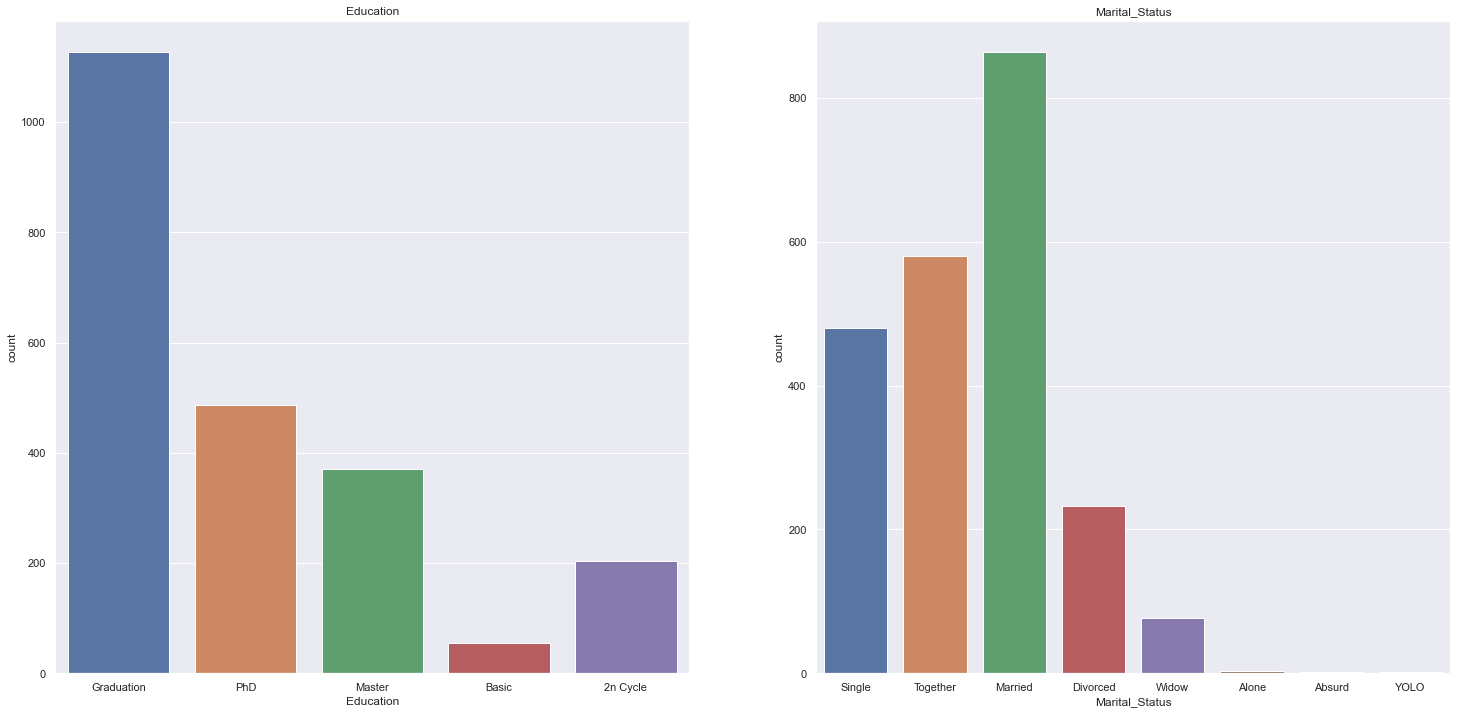

In [17]:
fig, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0], x="Education", data=cat_attributes)
sns.countplot(ax=axes[1], x="Marital_Status", data=cat_attributes)
axes[0].set_title('Education')
axes[1].set_title('Marital_Status');

## 2.0. Feature engineering


### 2.1. Mapa mental de hipóteses


A ideia aqui é listar qualitativamente o que aparenta ser uma entidade relevante no problema e quais os fatores que as influenciam. Serve para dar clareza ao formular hipóteses.


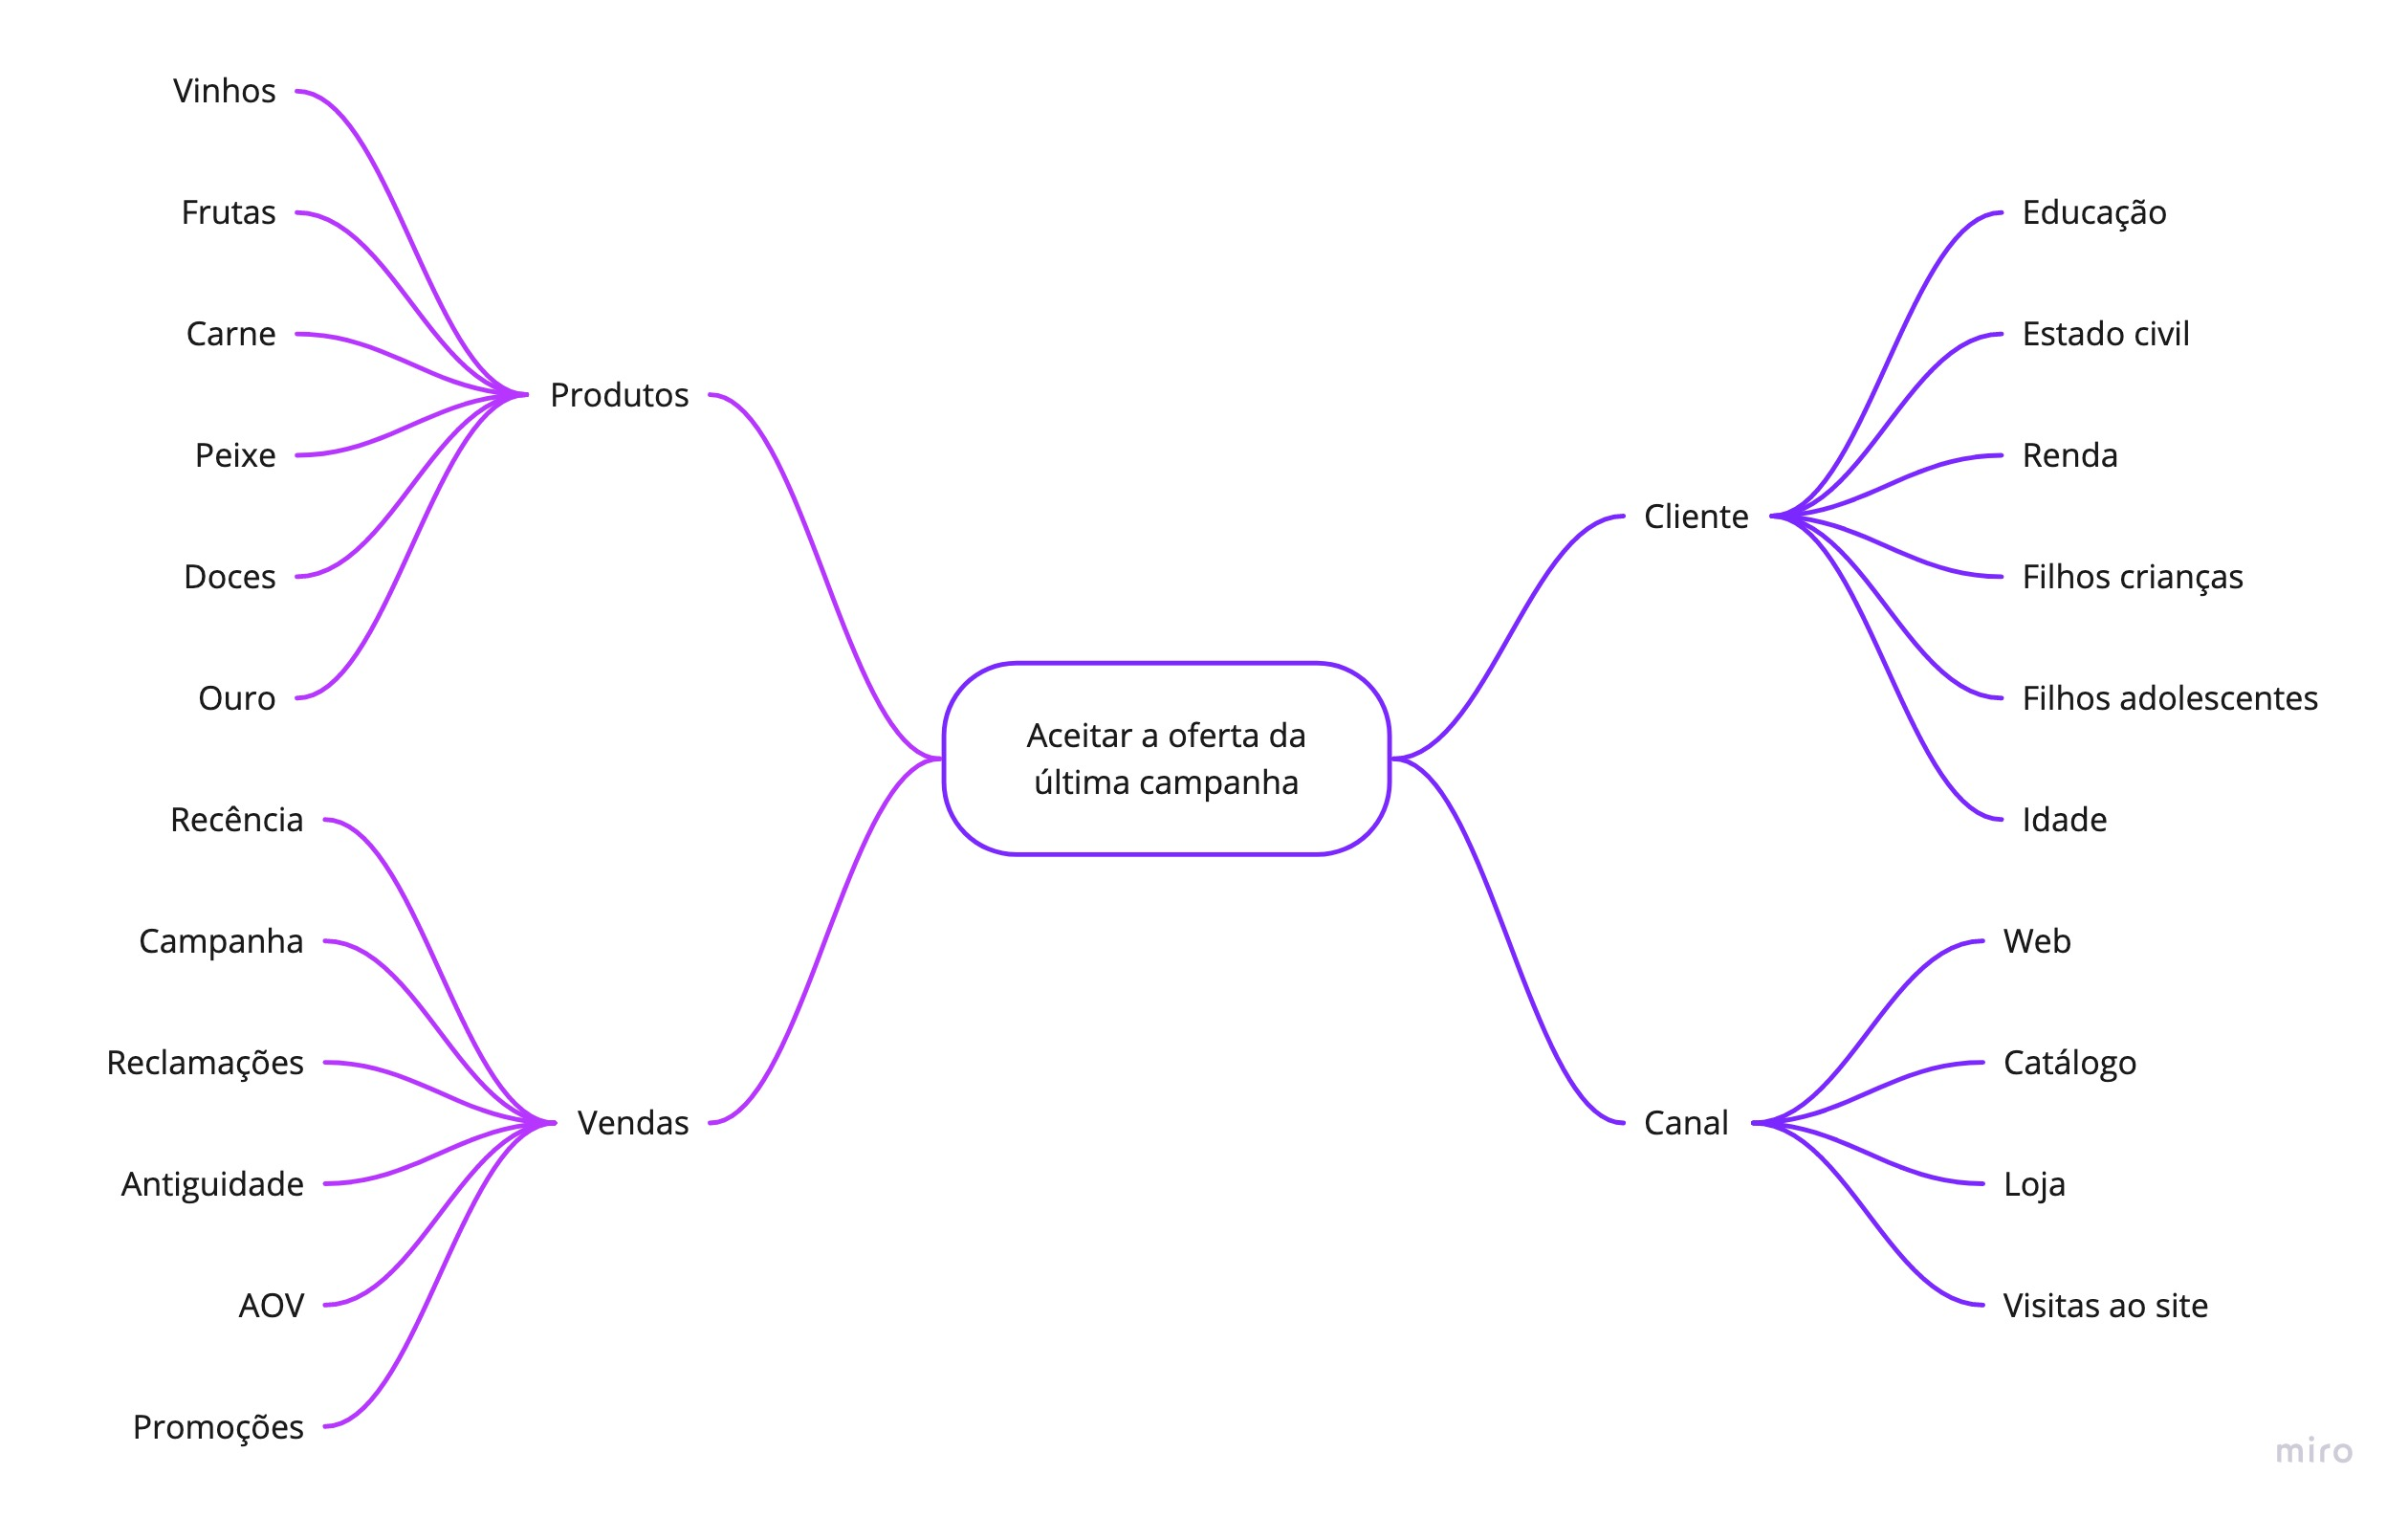

In [18]:
Image('img/Mind Map.jpg')

### 2.2. Criação das Hipóteses


Aqui crio hipóteses sobre a influencia dos atributos na variável resposta baseadas em conhecimento de negócio, ainda não pautadas em dados.

Durante o desenvolvimento, utilizo a Análise Exploratório para abordar o problema de duas formas:

- Confirmando ou negando crenças de negócio
- Trazendo novos insights não necessariamente relacionados às hipóteses


In [19]:
df2 = df1.copy()

#### 2.2.1. Hipóteses Clientes

**1.** Clientes com maior renda são MAIS propensos a aceitar a oferta da campanha.

**2.** Clientes com mais filhos são MENOS propensos a aceitar a oferta da campanha.

**3.** Clientes casados são MENOS propensos a aceitar a oferta da campanha.

**4.** Clientes com maior nível de educação formal são MAIS propensos a aceitar a oferta da campanha.

**5.** Clientes mais velhos são MENOS propensos a aceitar a oferta da campanha.


#### 2.2.2. Hipóteses Canal

**1.** Clientes que visitam mais o site são MAIS propensos a aceitar a oferta.

**2.** Clientes que fazem mais mais compras são MAIS propensos a aceitar a oferta.

**3.** Clientes que fazem mais mais compras via web são MAIS propensos a aceitar a oferta.

**4.** Clientes que visitam mais o site são MAIS propensos a aceitar a oferta.


#### 2.2.3. Hipóteses Produtos

**1.** Clientes que gastam mais em Ouro são MAIS propensos a aceitar a oferta.


#### 2.2.4. Hipóteses Vendas

**1.** Clientes que já reclamaram são MENOS propensos a aceitar a oferta da campanha.

**2.** Clientes que compraram em outras campanhas são MAIS propensos a aceitar a oferta da campanha.

**3.** Clientes mais antigos são MAIS propensos a aceitar a oferta da campanha.

**4.** Clientes que fizeram compras mais recentes são MENOS propensos a aceitar a oferta da campanha.

**5.** Clientes com maior AOV são MAIS propensos a aceitar a oferta da campanha.

**6.** Clientes que compram mais em promoções são MAIS propensos a aceitar a oferta da campanha.


### 2.3. Feature Engineering


Aqui derivo atributos que facilitam alguma visualização ou são essenciais para a validação das hipóteses.


In [20]:
# Age
max_year = max(df2['Dt_Customer'] + df2['Recency'].apply(lambda x: pd.Timedelta(x, unit='D'))).year
df2['Age'] = df2['Year_Birth'].apply(lambda x: max_year - x)

# Education_Level
education_map = {'2n Cycle':1, 'Basic':2, 'Graduation':3, 'Master':4, 'PhD':5}
df2['Education_Level'] = df2['Education'].replace(education_map)

# HeirHome
df2['HeirHome'] = df2['Kidhome'] + df2['Teenhome']

# Dt_Customer_Year
df2['Dt_Customer_Year'] = df2['Dt_Customer'].dt.year

# Dt_Customer_Month
df2['Dt_Customer_Month'] = df2['Dt_Customer'].dt.month

# Dt_Customer_Year_Month
df2['Dt_Customer_Year_Month'] = df2['Dt_Customer'].dt.strftime('%Y-%m')

# Time_Customer
## A quanto tempo (em meses) alguém é cliente da companhia
max_date = max(df2['Dt_Customer'] + df2['Recency'].apply(lambda x: pd.Timedelta(x, unit='D')))
df2['Time_Customer'] = df2['Dt_Customer'].apply(lambda x: max_date - x)
df2['Time_Customer'] = df2['Time_Customer'].dt.days / 30

# MntRegularProducts
df2['MntRegularProducts'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts']

# MntTotal
df2['MntTotal'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

# NumTotalPurchase
df2['NumTotalPurchase'] = df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases']

# Purchase_Frequency
df2['Purchase_Frequency'] = df2['NumTotalPurchase'] / df2['Time_Customer']

# Deal_Percent
df2['Deal_Percent'] = df2['NumDealsPurchases'] / df2['NumTotalPurchase']

# WebPuchasePercent
df2['WebPuchasePercent'] = df2['NumWebPurchases'] / df2['NumTotalPurchase']

# CatalogPuchasePercent
df2['CatalogPuchasePercent'] = df2['NumCatalogPurchases'] / df2['NumTotalPurchase']

# StorePuchasePercent
df2['StorePuchasePercent'] = df2['NumStorePurchases'] / df2['NumTotalPurchase']

# AOV_proxy
## AOV_proxy não é o AOV exato porque os gastos fornecidos são referentes aos 2 últimos anos e a quantidade de compras não apresentam um período definido
## Como quase todos os clientes têm menos de 2 anos de antiguidade, parece uma boa aproximação
df2['AOV_proxy'] = df2['MntTotal'] / df2['NumTotalPurchase']

# TotalAcceptedCmp
df2['TotalAcceptedCmp'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5']

# AcceptedCmpBefore
## Aceitou alguma camoanha antes da última
df2['AcceptedCmpBefore'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5']
df2['AcceptedCmpBefore'] = df2['AcceptedCmpBefore'].mask(df2['AcceptedCmpBefore']>0, 1)


In [21]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_Level', 'HeirHome', 'Dt_Customer_Year',
       'Dt_Customer_Month', 'Dt_Customer_Year_Month', 'Time_Customer',
       'MntRegularProducts', 'MntTotal', 'NumTotalPurchase',
       'Purchase_Frequency', 'Deal_Percent', 'WebPuchasePercent',
       'CatalogPuchasePercent', 'StorePuchasePercent', 'AOV_proxy',
       'TotalAcceptedCmp', 'AcceptedCmpBefore'],
      dtype='object')

In [22]:
bool_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmpBefore', 'Complain','Response']
df2[bool_cols] = df2[bool_cols].replace({0:False, 1:True})

## 3.0. Filtragem de variáveis


Nesta etapa, elimino linhas que fogem da regra de negócio (podem representar um erro de coleta, por exemplo) e colunas que não têm valores significativos ou que já foram representadas de outra forma na etapa de Feature Engineering.


In [23]:
df3 = df2.copy()

### 3.1. Filtragem de linhas


Alguns pontos que chamaram atenção durante a exploração:

- Usuários com NumTotalPurchase = 0 e MntTotal > 0
- Deal_Percent > 1
- Marital_Status in ['YOLO', 'Alone', 'Absurd']
- Age > 100
- Income = 0
- Income muito alto


#### 3.1.1. NumTotalPurchase = 0 e MntTotal > 0


É uma condição inconsistente, afinal, se o usuário gastou algo na loja, deveria haver algum número de compras associados.


In [24]:
print("Usuários nessas condições: {}".format(df3[(df3['NumTotalPurchase']==0) & (df3['MntTotal']>0)].shape[0]))

Usuários nessas condições: 6


In [25]:
df3.drop(df3[(df3['NumTotalPurchase']==0) & (df3['MntTotal']>0)].index, inplace=True)

#### 3.1.2. Deal_Percent > 1


O usuário não pode ter número de compras menor que o número de ofertas aproveitadas.


In [26]:
print("Usuários nessas condições: {}".format(df3[df3['Deal_Percent']>1].shape[0]))

Usuários nessas condições: 1


In [27]:
df3.drop(df3[df3['Deal_Percent']>1].index, inplace=True)

#### 3.1.1. Marital_Status in ['YOLO', 'Alone', 'Absurd']


In [28]:
df3[df3['Marital_Status']=='YOLO'].T

,2177,2202
ID,492,11133
Year_Birth,1973,1973
Education,PhD,PhD
Marital_Status,YOLO,YOLO
Income,48432.0,48432.0
Kidhome,0,0
Teenhome,1,1
Dt_Customer,2012-10-18 00:00:00,2012-10-18 00:00:00
Recency,3,3
MntWines,322,322


Insights:

- Procurar mais linhas duplicadas, diferenciando apenas o ID


In [29]:
df3[df3['Marital_Status']=='Alone'].T

,131,138,153
ID,433,7660,92
Year_Birth,1958,1973,1988
Education,Master,PhD,Graduation
Marital_Status,Alone,Alone,Alone
Income,61331.0,35860.0,34176.0
Kidhome,1,1,1
Teenhome,1,1,0
Dt_Customer,2013-03-10 00:00:00,2014-05-19 00:00:00,2014-05-12 00:00:00
Recency,42,37,12
MntWines,534,15,5


In [30]:
df3[df3['Marital_Status']=='Absurd'].T

,2093,2134
ID,7734,4369
Year_Birth,1993,1957
Education,Graduation,Master
Marital_Status,Absurd,Absurd
Income,79244.0,65487.0
Kidhome,0,0
Teenhome,0,0
Dt_Customer,2012-12-19 00:00:00,2014-01-10 00:00:00
Recency,58,48
MntWines,471,240


Dado o contexto e as observações, é possível que 'Alone', 'YOLO' e 'Absurd' tenham outros estados equivalentes.


#### 3.1.2. Age > 100


In [31]:
print('Lista de idades distintas:', set(df3['Age']))

Lista de idades distintas: {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 114, 115, 121}


In [32]:
df3[df3['Age']>100].T

,192,239,339
ID,7829,11004,1150
Year_Birth,1900,1893,1899
Education,2n Cycle,2n Cycle,PhD
Marital_Status,Divorced,Single,Together
Income,36640.0,60182.0,83532.0
Kidhome,1,0,0
Teenhome,0,1,0
Dt_Customer,2013-09-26 00:00:00,2014-05-17 00:00:00,2013-09-26 00:00:00
Recency,99,23,36
MntWines,15,8,755


Apesar das idades incomuns, não parece haver motivo para filtrar essas linhas.


#### 3.1.3. Income = 0


In [33]:
df3[df3['Income']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
10,1994,1983,Graduation,Married,0.0,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,False,False,False,False,False,False,3,11,False,31,3,1,2013,11,2013-11,10.766667,18,19,3,0.278638,0.333333,0.333333,0.000000,0.666667,6.333333,0,False
27,5255,1986,Graduation,Single,0.0,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,False,False,False,False,False,False,3,11,False,28,3,1,2013,2,2013-02,19.700000,275,637,27,1.370558,0.000000,1.000000,0.000000,0.000000,23.592593,0,False
43,7281,1959,PhD,Single,0.0,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,False,False,False,False,False,False,3,11,False,55,5,0,2013,11,2013-11,11.100000,147,186,8,0.720721,0.125000,0.125000,0.375000,0.500000,23.250000,0,False
48,7244,1951,Graduation,Single,0.0,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,False,False,False,False,False,False,3,11,False,63,3,3,2014,1,2014-01,9.200000,117,124,7,0.760870,0.428571,0.285714,0.142857,0.571429,17.714286,0,False
58,8557,1982,Graduation,Single,0.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,False,False,False,False,False,False,3,11,False,32,3,1,2013,6,2013-06,15.800000,40,46,5,0.316456,0.400000,0.400000,0.000000,0.600000,9.200000,0,False
71,10629,1973,2n Cycle,Married,0.0,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,False,False,False,False,False,False,3,11,False,41,1,1,2012,9,2012-09,25.000000,92,109,6,0.240000,0.500000,0.500000,0.000000,0.500000,18.166667,0,False
90,8996,1957,PhD,Married,0.0,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,False,False,False,False,False,False,3,11,False,57,5,3,2012,11,2012-11,22.800000,550,603,17,0.745614,0.705882,0.411765,0.117647,0.470588,35.470588,0,False
91,9235,1957,Graduation,Single,0.0,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,False,False,False,False,False,False,3,11,False,57,3,2,2014,5,2014-05,4.333333,17,18,3,0.692308,0.333333,0.333333,0.000000,0.666667,6.000000,0,False
92,5798,1973,Master,Together,0.0,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,False,False,False,False,False,False,3,11,False,41,4,0,2013,11,2013-11,10.500000,967,985,14,1.333333,0.071429,0.142857,0.285714,0.571429,70.357143,0,False
128,8268,1961,PhD,Married,0.0,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,False,False,False,False,False,False,3,11,False,53,5,1,2013,7,2013-07,15.000000,389,404,14,0.933333,0.214286,0.428571,0.071429,0.500000,28.857143,0,False


À primeira vista, não parece haver nada incomum nesse conjunto, por enquanto vou mantê-los na análise.


#### 3.1.4. Income muito alto


In [34]:
income_list = list(df3['Income'])
income_list.sort(reverse = True)
print('Top 20 rendas:', income_list[0:20])

Top 20 rendas: [666666.0, 162397.0, 160803.0, 157733.0, 157243.0, 157146.0, 113734.0, 105471.0, 102692.0, 102160.0, 101970.0, 98777.0, 98777.0, 96876.0, 96843.0, 96547.0, 95529.0, 95169.0, 94871.0, 94642.0]


In [35]:
df3[df3['Income']==666666].T

,2233
ID,9432
Year_Birth,1977
Education,Graduation
Marital_Status,Together
Income,666666.0
Kidhome,1
Teenhome,0
Dt_Customer,2013-06-02 00:00:00
Recency,23
MntWines,9


Além da renda muito superior e aparentemente "mal digitada", não parece haver nada incomum.


#### 3.1.5. Linhas duplicadas


In [36]:
print( "Linhas antes de eliminar duplicatas: {}".format( df3.shape[0] ) )
print( "Linhas após eliminar duplicatas: {}".format( df3.drop_duplicates( subset=df3.columns.difference( ['ID'] ) ).shape[0] ) )
print( "Linhas duplicadas: {}".format( df3.duplicated( subset=df3.columns.difference( ['ID'] ) ).sum() ) )
print( "Linhas duplicadas com Response=1: {}".format( df3[df3.duplicated( subset=df3.columns.difference( ['ID'] ) )]['Response'].sum() ) )

Linhas antes de eliminar duplicatas: 2233
Linhas após eliminar duplicatas: 2051
Linhas duplicadas: 182
Linhas duplicadas com Response=1: 21


As linhas duplicadas representam cerca de 8% da amostra e contém cerca de 6% dos compradores. Apesar de representarem frações expressivas, parece mais saudável para a análise eliminá-las.


In [37]:
df3.drop_duplicates(subset=df3.columns.difference(['ID']), inplace=True)

#### 3.1.6. Linhas duplicadas com campos Marital_Status, Age ou Income diferentes


A motivação para esta etapa é avaliar se um cliente pode aparentemente ter registros repetidos em que um deles tenha um campo "sujo". Por exemplo, um cliente com dois IDs, mas um com Marital_Status = single e outro Marital_Status = YOLO.


In [38]:
df3_marital_absurd = df3[df3['Marital_Status']=='Absurd'][df3.columns.difference(['ID','Marital_Status'])]
df3.merge(df3_marital_absurd, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,False,False,True,True,False,False,3,11,True,21,3,0,2012,12,2012-12,21.8,971,1216,21,0.963303,0.047619,0.190476,0.476190,0.333333,57.904762,2,True
1,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,False,False,False,False,False,False,3,11,False,57,4,0,2014,1,2014-01,8.9,1006,1169,14,1.573034,0.214286,0.214286,0.357143,0.428571,83.500000,0,False
2,10652,1957,Master,Together,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,False,False,False,False,False,False,3,11,False,57,4,0,2014,1,2014-01,8.9,1006,1169,14,1.573034,0.214286,0.214286,0.357143,0.428571,83.500000,0,False


In [39]:
df3_marital_yolo = df3[df3['Marital_Status']=='YOLO'][df3.columns.difference(['ID','Marital_Status'])]
df3.merge(df3_marital_yolo, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,False,False,False,False,False,False,3,11,True,41,5,1,2012,10,2012-10,23.866667,382,424,14,0.586592,0.357143,0.5,0.071429,0.428571,30.285714,0,False
1,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,False,False,False,False,False,False,3,11,True,41,5,1,2012,10,2012-10,23.866667,382,424,14,0.586592,0.357143,0.5,0.071429,0.428571,30.285714,0,False
2,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,False,False,False,False,False,False,3,11,False,41,5,1,2012,10,2012-10,23.866667,382,424,14,0.586592,0.357143,0.5,0.071429,0.428571,30.285714,0,False


In [40]:
df3_marital_alone = df3[df3['Marital_Status']=='Alone'][df3.columns.difference(['ID','Marital_Status'])]
df3.merge(df3_marital_alone, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,False,False,False,False,False,False,3,11,False,56,4,2,2013,3,2013-03,19.100000,591,632,18,0.942408,0.277778,0.611111,0.055556,0.333333,35.111111,0,False
1,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,True,False,False,False,False,False,3,11,True,41,5,2,2014,5,2014-05,4.600000,29,49,4,0.869565,0.500000,0.250000,0.250000,0.500000,12.250000,1,True
2,1626,1973,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,True,False,False,False,False,False,3,11,True,41,5,2,2014,5,2014-05,4.600000,29,49,4,0.869565,0.500000,0.250000,0.250000,0.500000,12.250000,1,True
3,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,False,False,False,False,False,False,3,11,False,26,3,1,2014,5,2014-05,4.833333,69,89,7,1.448276,0.571429,0.428571,0.000000,0.571429,12.714286,0,False
4,3312,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,False,False,False,False,False,False,3,11,False,26,3,1,2014,5,2014-05,4.833333,69,89,7,1.448276,0.571429,0.428571,0.000000,0.571429,12.714286,0,False


- IDs in [4369, 11133, 92, 7660] podem ser excluídos pelo critério Marital_Status
- IDs in [7734, 433] não são semelhantes a outros registros
- ID=492 é semelhante ao ID=11133, mas tem Response diferente


In [41]:
df3_age_100 = df3[df3['Age']>100][df3.columns.difference(['ID','Age'])].sort_values(['Year_Birth','Education'])
df3.merge(df3_age_100, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,False,False,False,False,False,True,3,11,False,114,1,1,2013,9,2013-09,12.433333,40,65,5,0.402145,0.200000,0.400000,0.200000,0.400000,13.000000,0,False
1,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,False,False,False,False,False,False,3,11,False,121,1,1,2014,5,2014-05,4.666667,20,22,3,0.642857,0.333333,0.333333,0.000000,0.666667,7.333333,0,False
2,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,False,False,True,False,False,False,3,11,False,115,5,0,2013,9,2013-09,12.433333,1629,1853,14,1.126005,0.071429,0.285714,0.428571,0.285714,132.357143,1,True


- Nenhuma linha repetida


In [42]:
df3_income_zero = df3[df3['Income']==0][df3.columns.difference(['ID','Income'])].sort_values(['Year_Birth','Education'])
df3.merge(df3_income_zero, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,1994,1983,Graduation,Married,0.0,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,False,False,False,False,False,False,3,11,False,31,3,1,2013,11,2013-11,10.766667,18,19,3,0.278638,0.333333,0.333333,0.000000,0.666667,6.333333,0,False
1,5255,1986,Graduation,Single,0.0,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,False,False,False,False,False,False,3,11,False,28,3,1,2013,2,2013-02,19.700000,275,637,27,1.370558,0.000000,1.000000,0.000000,0.000000,23.592593,0,False
2,7281,1959,PhD,Single,0.0,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,False,False,False,False,False,False,3,11,False,55,5,0,2013,11,2013-11,11.100000,147,186,8,0.720721,0.125000,0.125000,0.375000,0.500000,23.250000,0,False
3,7244,1951,Graduation,Single,0.0,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,False,False,False,False,False,False,3,11,False,63,3,3,2014,1,2014-01,9.200000,117,124,7,0.760870,0.428571,0.285714,0.142857,0.571429,17.714286,0,False
4,8557,1982,Graduation,Single,0.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,False,False,False,False,False,False,3,11,False,32,3,1,2013,6,2013-06,15.800000,40,46,5,0.316456,0.400000,0.400000,0.000000,0.600000,9.200000,0,False
5,8724,1982,Graduation,Single,28567.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,False,False,False,False,False,False,3,11,False,32,3,1,2013,6,2013-06,15.800000,40,46,5,0.316456,0.400000,0.400000,0.000000,0.600000,9.200000,0,False
6,10629,1973,2n Cycle,Married,0.0,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,False,False,False,False,False,False,3,11,False,41,1,1,2012,9,2012-09,25.000000,92,109,6,0.240000,0.500000,0.500000,0.000000,0.500000,18.166667,0,False
7,8996,1957,PhD,Married,0.0,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,False,False,False,False,False,False,3,11,False,57,5,3,2012,11,2012-11,22.800000,550,603,17,0.745614,0.705882,0.411765,0.117647,0.470588,35.470588,0,False
8,9235,1957,Graduation,Single,0.0,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,False,False,False,False,False,False,3,11,False,57,3,2,2014,5,2014-05,4.333333,17,18,3,0.692308,0.333333,0.333333,0.000000,0.666667,6.000000,0,False
9,5798,1973,Master,Together,0.0,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,False,False,False,False,False,False,3,11,False,41,4,0,2013,11,2013-11,10.500000,967,985,14,1.333333,0.071429,0.142857,0.285714,0.571429,70.357143,0,False


- IDs [8557, 8268, 3769, 1612] podem ser excluídos pelo critério Income=0


In [43]:
df3_high_income = df3[df3['Income']==666666][df3.columns.difference(['ID','Income'])]
df3.merge(df3_high_income, how='inner')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,HeirHome,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Year_Month,Time_Customer,MntRegularProducts,MntTotal,NumTotalPurchase,Purchase_Frequency,Deal_Percent,WebPuchasePercent,CatalogPuchasePercent,StorePuchasePercent,AOV_proxy,TotalAcceptedCmp,AcceptedCmpBefore
0,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,False,False,False,False,False,False,3,11,False,37,3,1,2013,6,2013-06,16.3,50,62,7,0.429448,0.571429,0.428571,0.142857,0.428571,8.857143,0,False


- Nenhuma linha repetida


#### 3.1.7. Resumo das linhas excluídas


In [44]:
df3_dupl_list = [4369, 11133, 92, 7660, 8557, 8268, 3769, 1612]
df3.drop(df3[df3['ID'].isin(df3_dupl_list)].index, inplace=True)

print('Número de linhas: {}'.format(df3.shape[0]))
print('Número de compradores: {}'.format(df3[df3['Response']==1].shape[0]))

Número de linhas: 2043
Número de compradores: 311


In [45]:
print('Possíveis filtrados: {}'.format(df3[(df3['Marital_Status'].isin(['YOLO', 'Alone', 'Absurd'])) \
    | (df3['Income']==666666) \
    | (df3['Income']==0) \
    | (df3['Age']>100)].shape[0]))

print('Compradores possíveis filtrados: {}'.format(
    df3[((df3['Marital_Status'].isin(['YOLO', 'Alone', 'Absurd'])) \
    | (df3['Income']==666666) \
    | (df3['Income']==0) \
    | (df3['Age']>100)) \
    & (df3['Response']==1)].shape[0]))

Possíveis filtrados: 27
Compradores possíveis filtrados: 2


### 3.2. Filtragem de colunas


Como todas os atributos já estão disponíveis previamente no momento da compra, todos os atributos disponíveis podem ser usados nos modelos de classificação.


In [46]:
cols_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df3.drop(cols_drop, axis=1, inplace=True)
df3.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Education_Level', 'HeirHome',
       'Dt_Customer_Year', 'Dt_Customer_Month', 'Dt_Customer_Year_Month',
       'Time_Customer', 'MntRegularProducts', 'MntTotal', 'NumTotalPurchase',
       'Purchase_Frequency', 'Deal_Percent', 'WebPuchasePercent',
       'CatalogPuchasePercent', 'StorePuchasePercent', 'AOV_proxy',
       'TotalAcceptedCmp', 'AcceptedCmpBefore'],
      dtype='object')

In [47]:
print('Número de linhas: {}'.format(df3.shape[0]))
print('Número de colunas: {}'.format(df3.shape[1]))

Número de linhas: 2043
Número de colunas: 42


## 4.0. Análise exploratória dos dados


In [48]:
df4 = df3.copy()
num_attributes = df4.select_dtypes(include=['int64', 'float64'])
cat_attributes = df4.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 4.1. Análise univariada


Nesta etapa observo como estão distribuídos os atributos para ter uma ideia do perfil dos clientes.


#### 4.1.1. Variável resposta


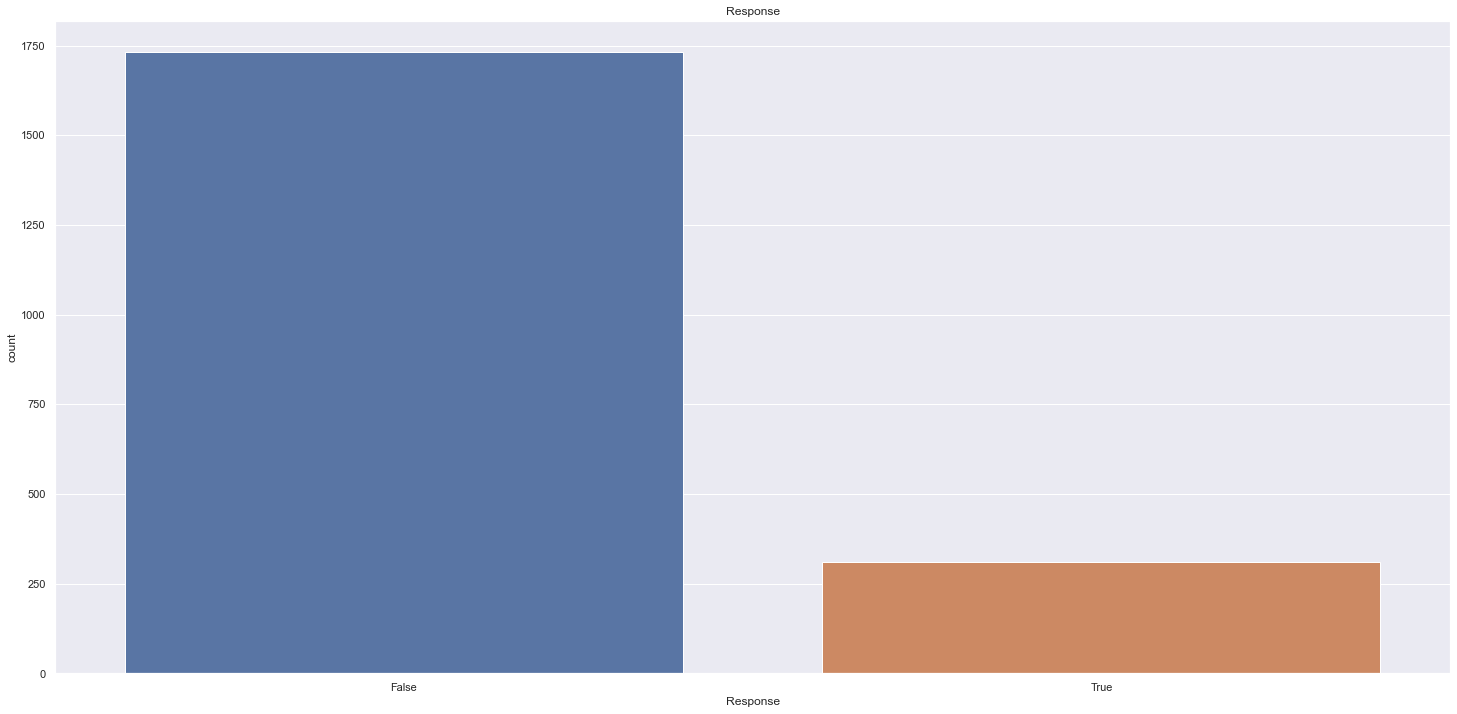

In [49]:
sns.countplot(x="Response", data=cat_attributes).set_title('Response');

In [50]:
print("Porcentagem de usuários target: {p:.2f}%".format(p=100*cat_attributes['Response'].sum()/cat_attributes['Response'].count()))

Porcentagem de usuários target: 15.22%


#### 4.1.2. Variáveis numéricas


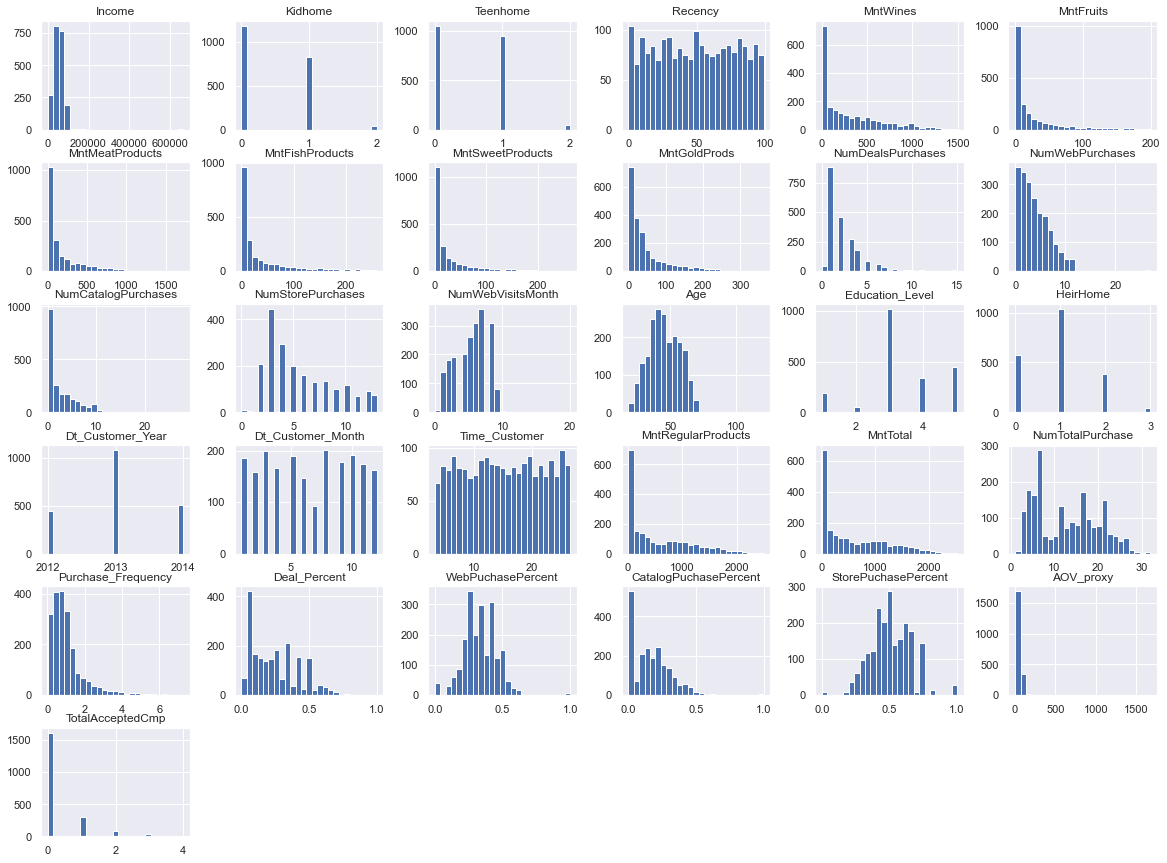

In [51]:
num_attributes.hist(bins=25, figsize=(20,15));

Insights rápidos:

- Os clientes parecem mais propensos a gastar com vinho. Talvez porque comprem mais ou porque o preço é maior
- Quase metade da base nunca comprou em uma promoção
- O "cliente médio" tem por volta de 40 anos, tem nível superior e tem pelo menos 1 filha/filho
- A maior parte dos clientes fez a primeira compra em Janeiro ou Dezembro. Poucos passaram a ser clientes no meio do ano.
- Aproximadamente metade dos clientes virou cliente da loja em 2013. Se consider que no contexto do problema estamos em OUT/2014 (max_date) e que os 3 últimos meses correspondem a menos de 50% dos novos clientes, é improvável que 2014 termine com mais clientes novos que 2013.
- Há 2 picos no número total de compras, o que pode significar que há pelo menos 2 grupos de clientes, baseados na quantidade de compras.


Os outliers distorcem os histogramas dos números de compras pela Web e por catálogo, o número de visitas na web, AOV e Income. Analisarei esses atributos em cortes.


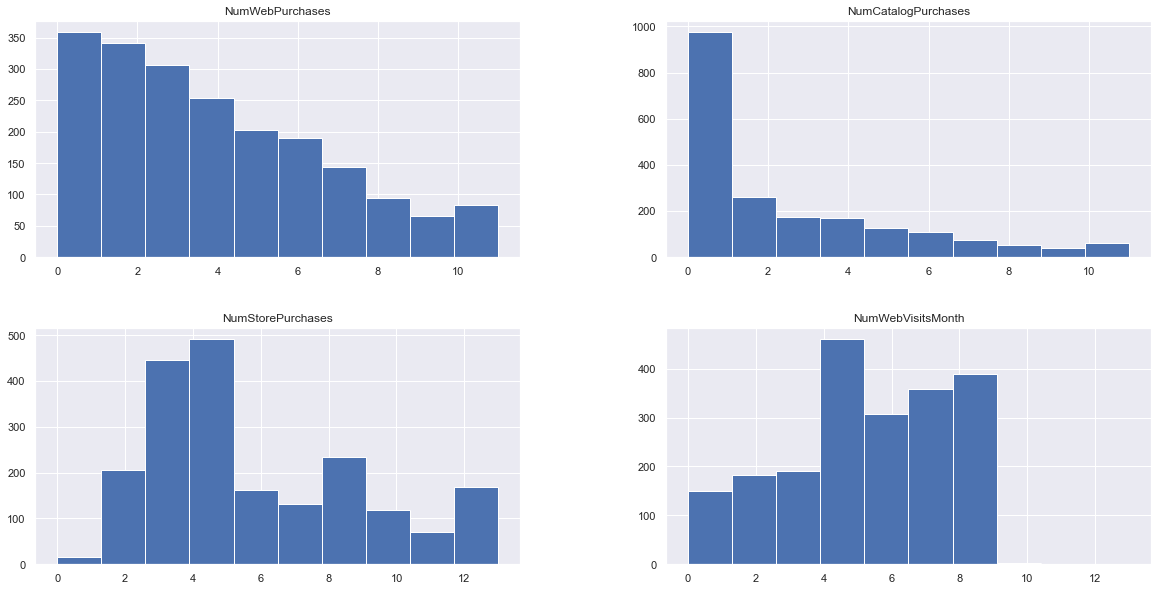

In [52]:
purchase_att_list = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
num_attributes_purchase_cut = num_attributes[num_attributes[purchase_att_list]<=15][purchase_att_list]
num_attributes_purchase_cut.hist(figsize=(20,10));

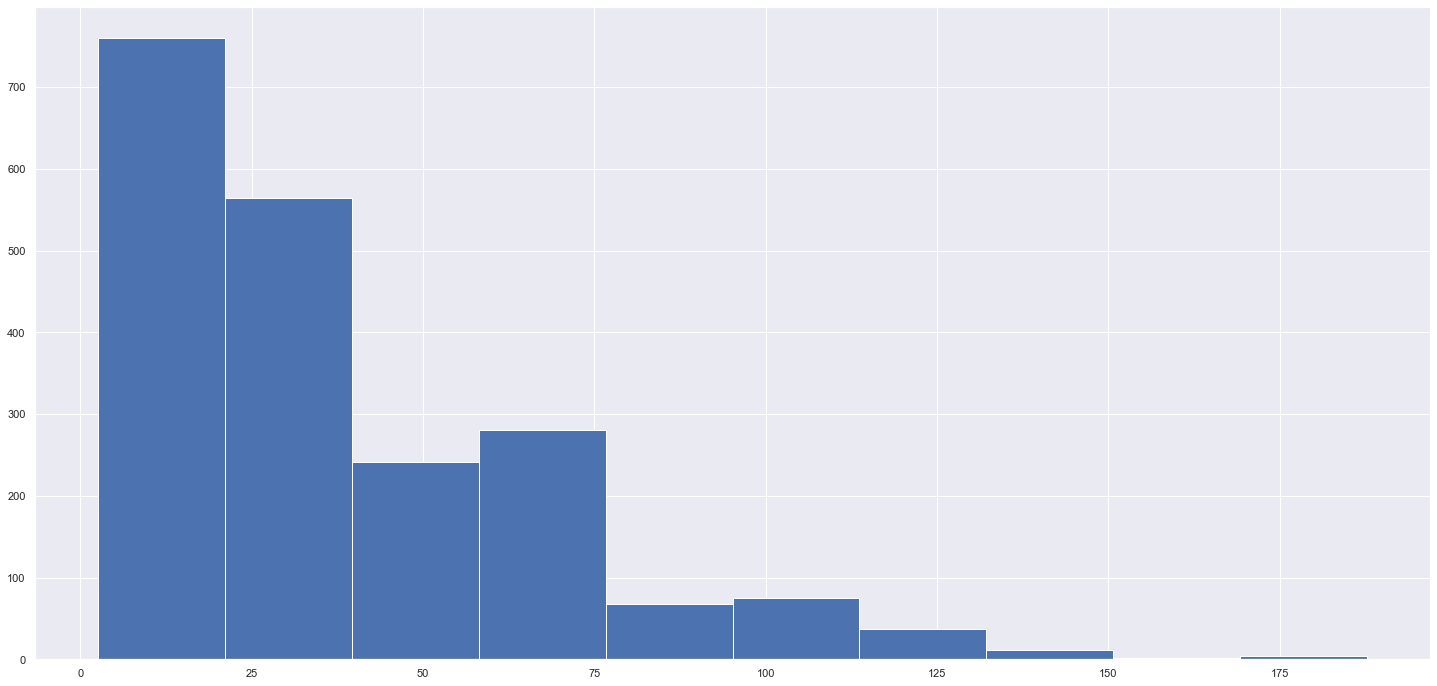

In [53]:
num_attributes_aov_cut = num_attributes[num_attributes['AOV_proxy']<1000]['AOV_proxy']
num_attributes_aov_cut.hist();

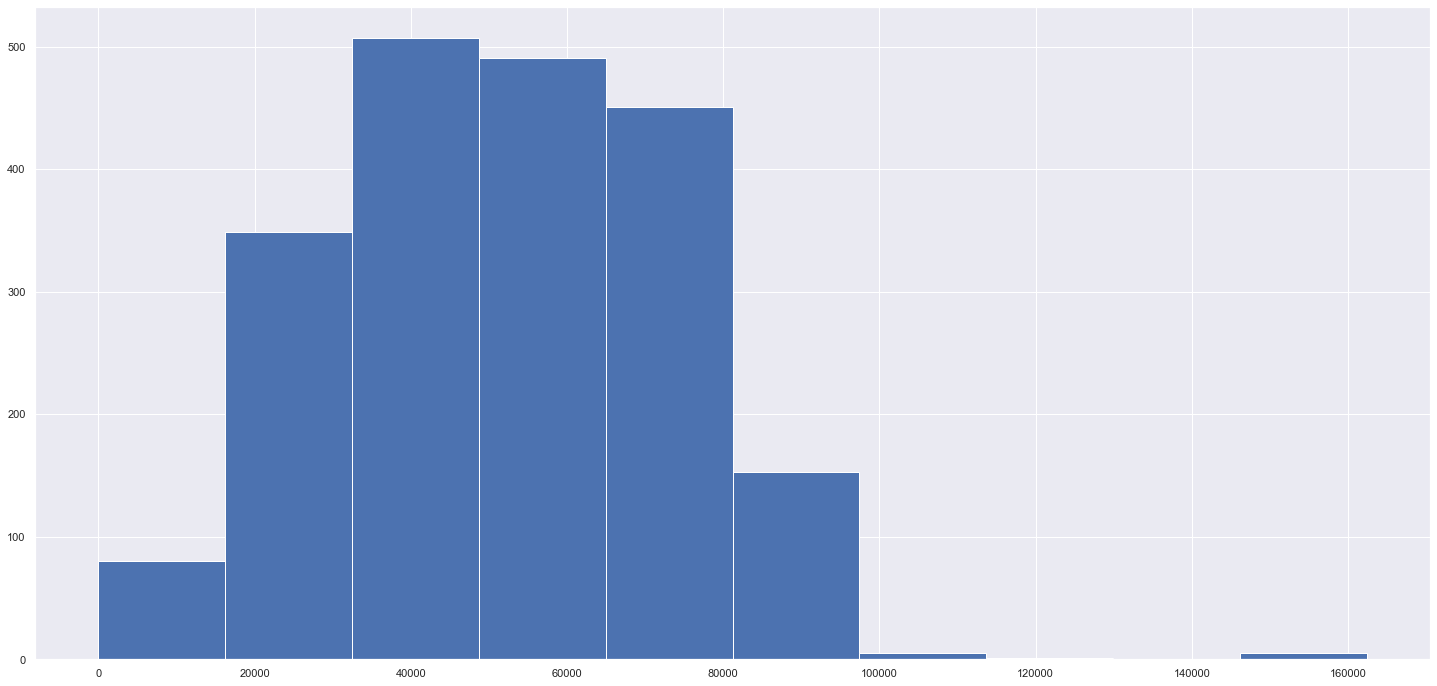

In [54]:
num_attributes_income_cut = num_attributes[num_attributes['Income']<600000]['Income']
num_attributes_income_cut.hist();

Insights rápidos

- Os clientes parecem menos propensos a comprar pelo catálogo
- A loja parece ser o canal favorito dos compradores
- Cerca de 75% tem cesta média inferior ou igual a 50 MU
- Há uma grande concentração no intervalo de [3, 4] compras em loja no mês
- Poucos usuários não acessam o site da loja. Além disso os histogramas de compras e de visitas na web parecem indicar uma correlação negativa.


#### 4.1.3. Variáveis categóricas


In [55]:
cat_attributes.columns

Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Dt_Customer_Year_Month', 'AcceptedCmpBefore'],
      dtype='object')

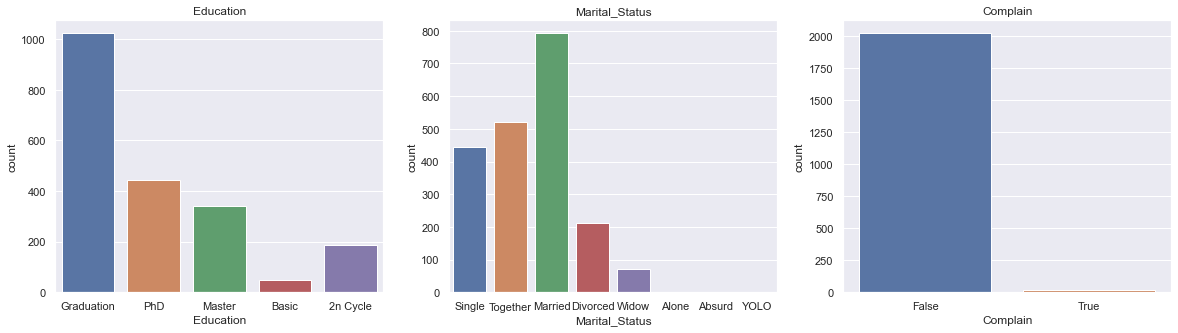

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.countplot(ax=axes[0], x="Education", data=cat_attributes)
sns.countplot(ax=axes[1], x="Marital_Status", data=cat_attributes)
sns.countplot(ax=axes[2], x="Complain", data=cat_attributes)
axes[0].set_title('Education')
axes[1].set_title('Marital_Status')
axes[2].set_title('Complain');

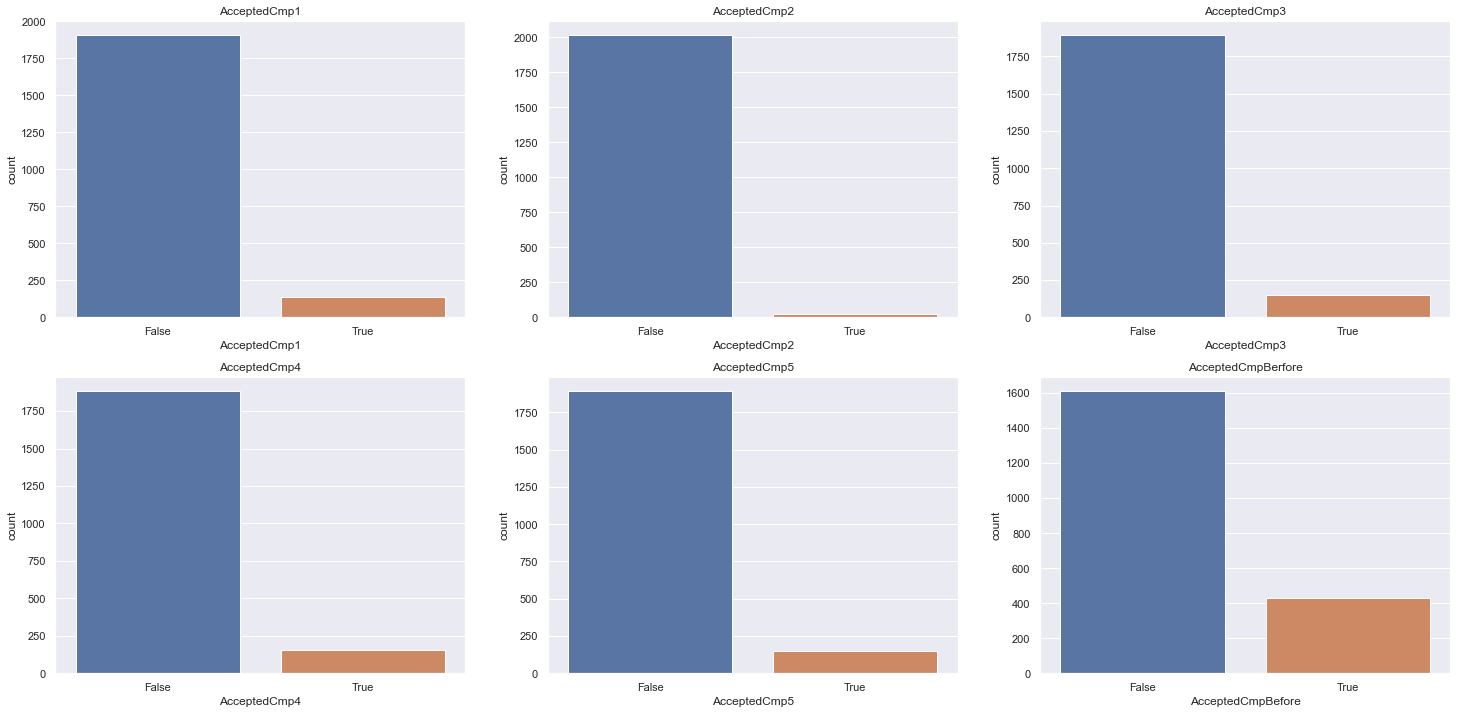

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3)
sns.countplot(ax=axes[0][0], x="AcceptedCmp1", data=cat_attributes)
sns.countplot(ax=axes[0][1], x="AcceptedCmp2", data=cat_attributes)
sns.countplot(ax=axes[0][2], x="AcceptedCmp3", data=cat_attributes)
sns.countplot(ax=axes[1][0], x="AcceptedCmp4", data=cat_attributes)
sns.countplot(ax=axes[1][1], x="AcceptedCmp5", data=cat_attributes)
sns.countplot(ax=axes[1][2], x="AcceptedCmpBefore", data=cat_attributes)
axes[0][0].set_title('AcceptedCmp1')
axes[0][1].set_title('AcceptedCmp2')
axes[0][2].set_title('AcceptedCmp3')
axes[1][0].set_title('AcceptedCmp4')
axes[1][1].set_title('AcceptedCmp5')
axes[1][2].set_title('AcceptedCmpBerfore');

Insights rápidos:

- A maior parte dos compradores tem pelo menos Graduação
- Cerca de 70% dos clientes tem companheira/companheiro
- A 2a campanha parece ter sido a mais ineficiente
- Cerca de 20% já aceitou oferta em uma das campanhas


### 4.2. Análise bivariada


Nesta etapa observo como os atributos parecem influenciar a variável resposta. Pode dar uma ideia de quais atributos são mais relevantes para um modelo de classificação.


#### 4.2.1. Atributos numéricos


Usuários que aceitaram a campanha


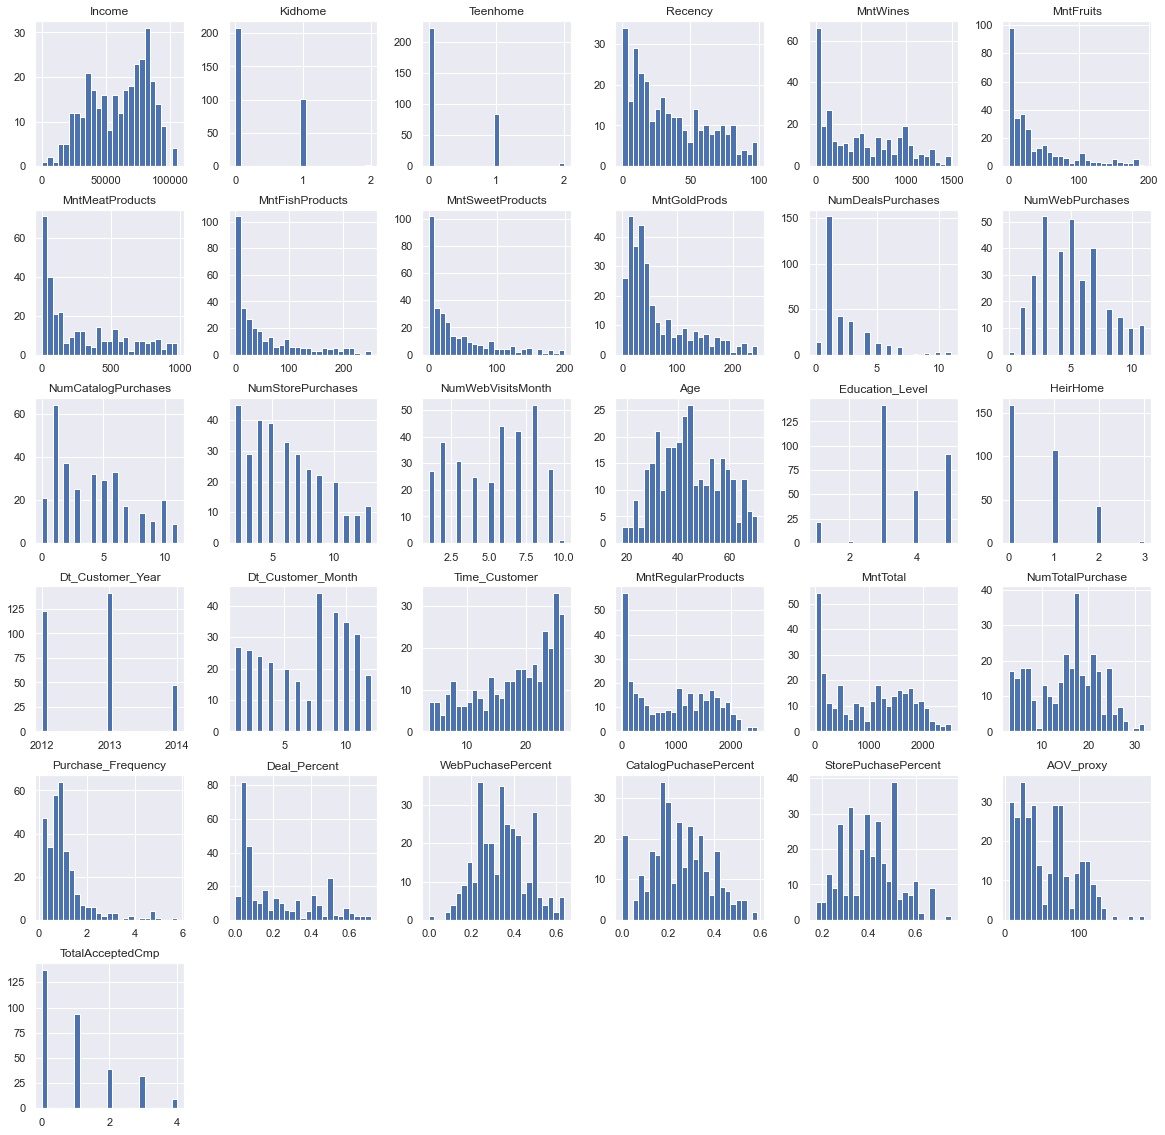

In [58]:
num_attributes_target = df4[df4['Response']].select_dtypes(include=['int64', 'float64'])
num_attributes_target.hist(bins=25, figsize=(20,20));

Usuários que NÃO aceitaram a campanha (sem outliers)


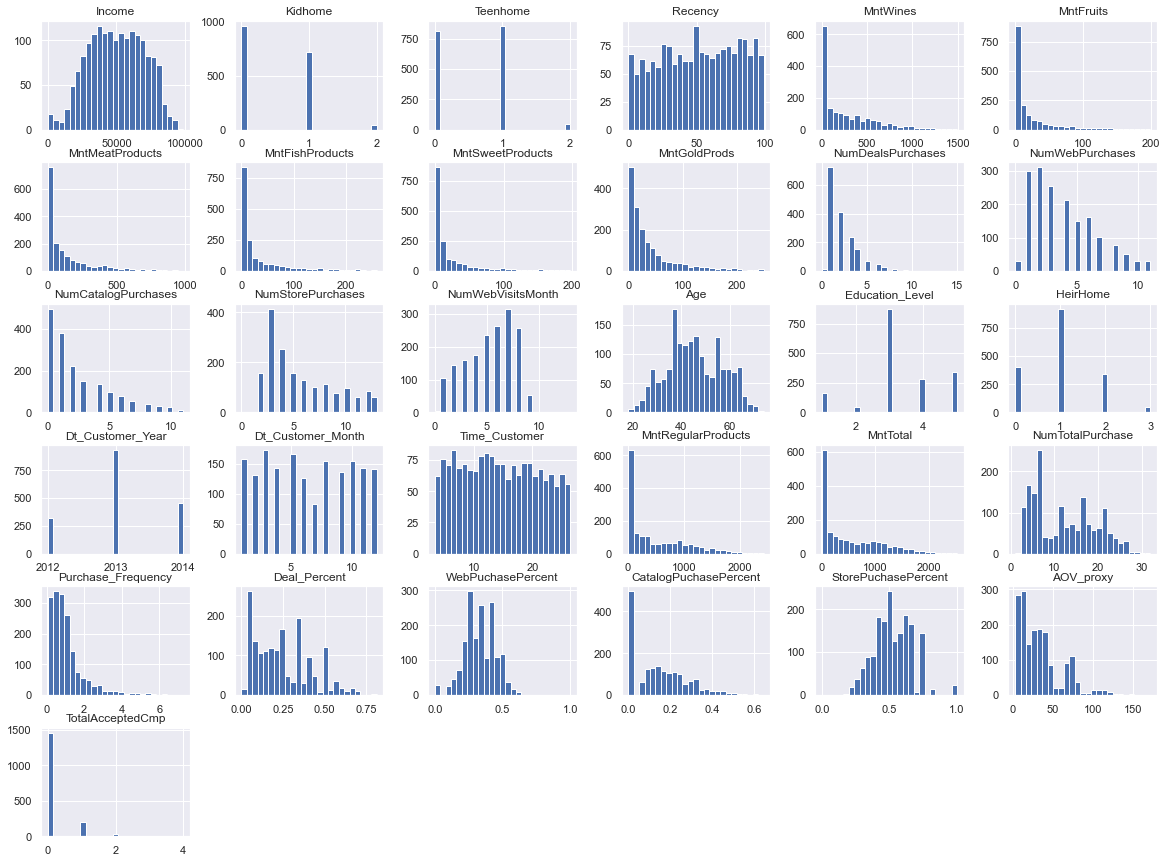

In [59]:
num_attributes_common = df4[df4['Response']==False].select_dtypes(include=['int64', 'float64'])
condition_index = (num_attributes_common['Income']<150000) \
    & (num_attributes_common['NumWebPurchases']<=15) \
    & (num_attributes_common['NumCatalogPurchases']<=15) \
    & (num_attributes_common['NumStorePurchases']<=15) \
    & (num_attributes_common['NumWebVisitsMonth']<=15) \
    & (num_attributes_common['Age']<100) \
    & (num_attributes_common['AOV_proxy']<500)
num_attributes_common_filter = num_attributes_common[condition_index]
num_attributes_common_filter.hist(bins=25, figsize=(20,15));

Insights rápidos:

- **Income**: Usuários target parecem ter MAIOR RENDA em relação aos demais
- **Kidhome, Teenhome**: Usuários target parecem ter MENOS FILHOS em relação aos demais
- **Recency**: Usuários target apresentam MENOR RECÊNCIA em relação aos demais
- **MntGoldProds, MntWines**: Usuários target parecem GASTAR MAIS, sobretudo com Ouro e Vinho. Os demais gastos são parecidos.
- **Deal_Percent**: Usuários target parecem APROVEITAR MENOS as promoções
- **WebPurchasePercent, NumWebVisitsMonth**: Usuários target parecem COMPRAR MAIS pela Web, além de fazer MAIS acessos
- **Age**: A faixa de idade dos usuários target parece MAIS ABRANGENTE, com uma concentração um pouco maior entre 60 e 70 anos que a de usuários comuns
- **Education_Level**: Usuários comeducação formal mais avançada parecem MAIS PROPENSOS a aderir à campanha
- **Time_Customer**: Usuários MAIS ANTIGOS parecem mais propensos a aderir à campanha
- **Dt_Customer_Month**:Usuários que fizeram a 1a compra DEPOIS DE JULHO parecem mais propensos a aderir à campanha
- **MntTotal, NumTotalPurchase**: Usuários que compram e gastam mais parecem MAIS PROPENSOS a aderir à campanha
- **AOV_proxy**: Usuários com MAIOR AOV parecem mais propensos a aderir à campanha
- **TotalAcceptedCmp**: Usuários que aderiram às campanhas anteriores parecem MAIS PROPENSOS a aceitar a última


#### 4.2.2. Atributos categóricos


In [60]:
cat_attributes.columns

Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Dt_Customer_Year_Month', 'AcceptedCmpBefore'],
      dtype='object')

In [61]:
# Education
pivot_education = pd.pivot_table(cat_attributes[['Education','Response']].reset_index(), index='Education', columns='Response', aggfunc='count', margins=True)['index']
pivot_education['Percent_True'] = pivot_education[True]/pivot_education['All']
pivot_education['Percent_False'] = pivot_education[False]/pivot_education['All']
pivot_education

Response,False,True,All,Percent_True,Percent_False
Education,,,,,
2n Cycle,166,22,188,0.117021,0.882979
Basic,47,2,49,0.040816,0.959184
Graduation,881,142,1023,0.138807,0.861193
Master,286,54,340,0.158824,0.841176
PhD,352,91,443,0.205418,0.794582
All,1732,311,2043,0.152227,0.847773


In [62]:
# Marital_Status
pivot_marital = pd.pivot_table(cat_attributes[['Marital_Status','Response']].reset_index(), index='Marital_Status', columns='Response', aggfunc='count', margins=True)['index']
pivot_marital['Percent_True'] = pivot_marital[True]/pivot_marital['All']
pivot_marital['Percent_False'] = pivot_marital[False]/pivot_marital['All']
pivot_marital

Response,False,True,All,Percent_True,Percent_False
Marital_Status,,,,,
Absurd,NaN,1.0,1,1.000000,NaN
Alone,1.0,NaN,1,NaN,1.000000
Divorced,170.0,43.0,213,0.201878,0.798122
Married,700.0,92.0,792,0.116162,0.883838
Single,343.0,101.0,444,0.227477,0.772523
Together,465.0,55.0,520,0.105769,0.894231
Widow,52.0,19.0,71,0.267606,0.732394
YOLO,1.0,NaN,1,NaN,1.000000
All,1732.0,311.0,2043,0.152227,0.847773


In [63]:
# Complain
pivot_complain = pd.pivot_table(cat_attributes[['Complain','Response']].reset_index(), index='Complain', columns='Response', aggfunc='count', margins=True)['index']
pivot_complain['Percent_True'] = pivot_complain[True]/pivot_complain['All']
pivot_complain['Percent_False'] = pivot_complain[False]/pivot_complain['All']
pivot_complain

Response,False,True,All,Percent_True,Percent_False
Complain,,,,,
False,1715,308,2023,0.152249,0.847751
True,17,3,20,0.150000,0.850000
All,1732,311,2043,0.152227,0.847773


In [64]:
# AcceptedCmp1
pivot_cmp1 = pd.pivot_table(cat_attributes[['AcceptedCmp1','Response']].reset_index(), index='AcceptedCmp1', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp1['Percent_False'] = pivot_cmp1[False]/pivot_cmp1['All']
pivot_cmp1['Percent_True'] = pivot_cmp1[True]/pivot_cmp1['All']
pivot_cmp1

Response,False,True,All,Percent_False,Percent_True
AcceptedCmp1,,,,,
False,1671,237,1908,0.875786,0.124214
True,61,74,135,0.451852,0.548148
All,1732,311,2043,0.847773,0.152227


In [65]:
# AcceptedCmp2
pivot_cmp2 = pd.pivot_table(cat_attributes[['AcceptedCmp2','Response']].reset_index(), index='AcceptedCmp2', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp2['Percent_False'] = pivot_cmp2[False]/pivot_cmp2['All']
pivot_cmp2['Percent_True'] = pivot_cmp2[True]/pivot_cmp2['All']
pivot_cmp2

Response,False,True,All,Percent_False,Percent_True
AcceptedCmp2,,,,,
False,1725,292,2017,0.855231,0.144769
True,7,19,26,0.269231,0.730769
All,1732,311,2043,0.847773,0.152227


In [66]:
# AcceptedCmp3
pivot_cmp3 = pd.pivot_table(cat_attributes[['AcceptedCmp3','Response']].reset_index(), index='AcceptedCmp3', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp3['Percent_False'] = pivot_cmp3[False]/pivot_cmp3['All']
pivot_cmp3['Percent_True'] = pivot_cmp3[True]/pivot_cmp3['All']
pivot_cmp3

Response,False,True,All,Percent_False,Percent_True
AcceptedCmp3,,,,,
False,1652,241,1893,0.872689,0.127311
True,80,70,150,0.533333,0.466667
All,1732,311,2043,0.847773,0.152227


In [67]:
# AcceptedCmp4
pivot_cmp4 = pd.pivot_table(cat_attributes[['AcceptedCmp4','Response']].reset_index(), index='AcceptedCmp4', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp4['Percent_False'] = pivot_cmp4[False]/pivot_cmp4['All']
pivot_cmp4['Percent_True'] = pivot_cmp4[True]/pivot_cmp4['All']
pivot_cmp4

Response,False,True,All,Percent_False,Percent_True
AcceptedCmp4,,,,,
False,1631,254,1885,0.865252,0.134748
True,101,57,158,0.639241,0.360759
All,1732,311,2043,0.847773,0.152227


In [68]:
# AcceptedCmp5
pivot_cmp5 = pd.pivot_table(cat_attributes[['AcceptedCmp5','Response']].reset_index(), index='AcceptedCmp5', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp5['Percent_False'] = pivot_cmp5[False]/pivot_cmp5['All']
pivot_cmp5['Percent_True'] = pivot_cmp5[True]/pivot_cmp5['All']
pivot_cmp5

Response,False,True,All,Percent_False,Percent_True
AcceptedCmp5,,,,,
False,1668,227,1895,0.880211,0.119789
True,64,84,148,0.432432,0.567568
All,1732,311,2043,0.847773,0.152227


In [69]:
# AcceptedCmpBefore
pivot_cmp_before = pd.pivot_table(cat_attributes[['AcceptedCmpBefore','Response']].reset_index(), index='AcceptedCmpBefore', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp_before['Percent_False'] = pivot_cmp_before[False]/pivot_cmp_before['All']
pivot_cmp_before['Percent_True'] = pivot_cmp_before[True]/pivot_cmp_before['All']
pivot_cmp_before

Response,False,True,All,Percent_False,Percent_True
AcceptedCmpBefore,,,,,
False,1476,137,1613,0.915065,0.084935
True,256,174,430,0.595349,0.404651
All,1732,311,2043,0.847773,0.152227


Insights rápidos

- Os "sozinhos" (solteiros, viúvos e separados) parecem mais propensos a aderir a campanhas
- Usuários que já aderiram a alguma campanha parecem mais propensos a converter na última
- As campanhas 1 e 5 parecem ter sido mais bem-sucedidas em converter o usuário na última campanha. A 2 parece ter sido a mais eficiente nesse quesito, mas poucos clientes aderiram a ela.
- Reclamar ou não parece não afetar a conversão na última campanha


### 4.3. Análise multivariada


Nesta etapa, procuro como os atributos influenciam uns aos outros. Atributos com alta correlação podem fornecer insights sobre o negócio e talvez possam ser suprimidos na construção do modelo.


#### 4.3.1. Atributos numéricos


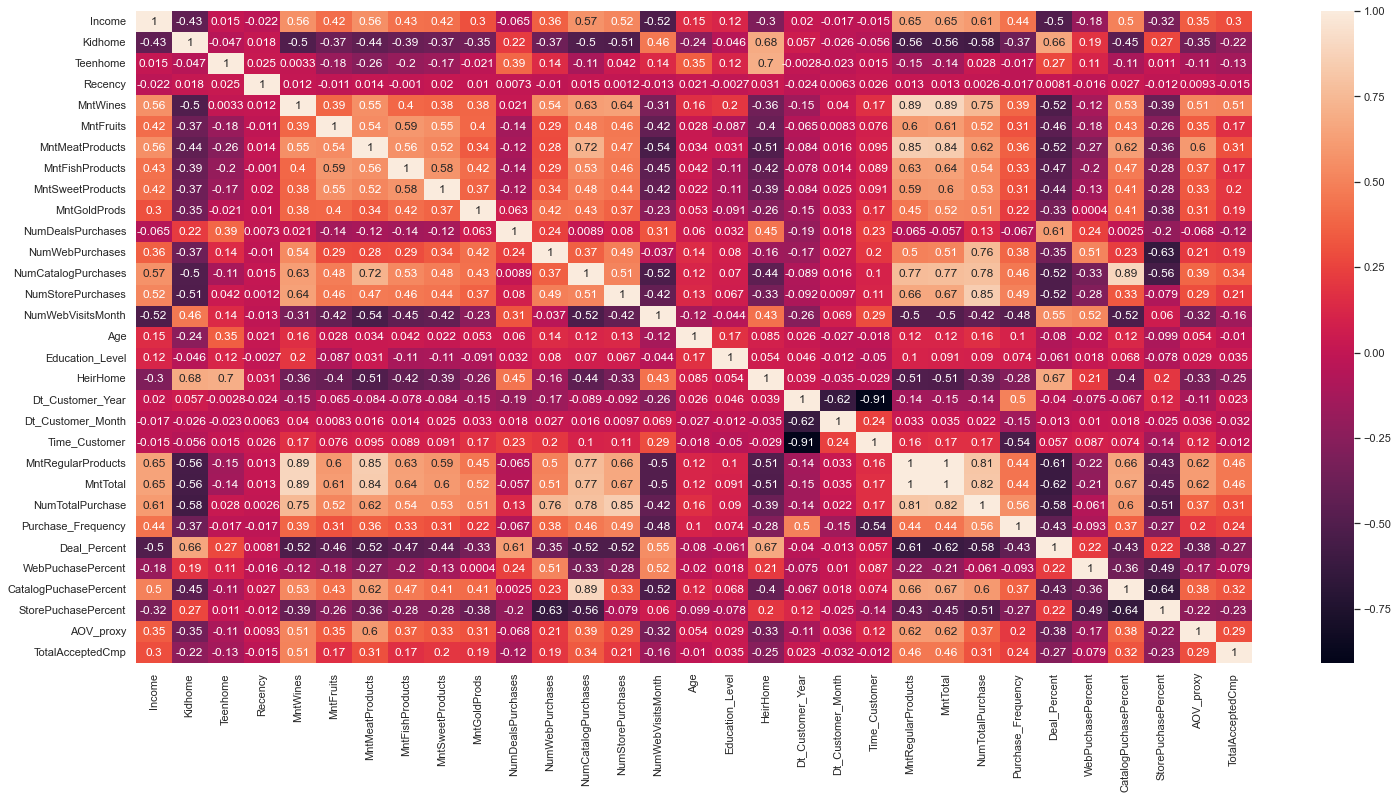

In [70]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

Insights rápidos:

- Clientes de MAIOR RENDA tendem a comprar mais Vinho e Carne e menos Produtos de Ouro.
- Clientes de MAIOR RENDA parecem comprar mais via catálogo e aproveitar menos promoções
- Clientes de MAIOR RENDA tendem a fazer mais compras e gastar mais

---

- Clientes com mais crianças tendem a comprar menos e aproveitar mais promoções

---

- Clientes que gastam mais com vinho tendem a gastar mais com carne
- Clientes que gastam mais com vinho tendem a aproveitar menos promoções
- Clientes que gastam mais com vinho tendem a comprar mais via catálogo
- Clientes que gastam mais com vinho convertem em campanhas mais frequentemente

---

- Clientes que gastam mais com frutas, carnes, peixe ou doces tendem a gastar mais nas outras 3 categorias

---

- Clientes que gastam mais com carne têm maior AOV e gastam mais via catálogo

---

- Clientes que compram MAIS via catálogo acessam MENOS o site
- Clientes que compram MAIS via catálogo aproveitam MENOS promoções

---

- Usuários com MAIS VISITAS ao site aproveitam MAIS PROMOÇÕES e GASTAM MENOS e não necessariamente fazem mais compras online

---

- Idade e Educação não parecem infleunciar nos gastos nem na quantidade de compras

---

- Clientes que gastam mais parecem preferir comprar mais via catálogo e menos via loja


#### 4.3.2. Atributos categóricos


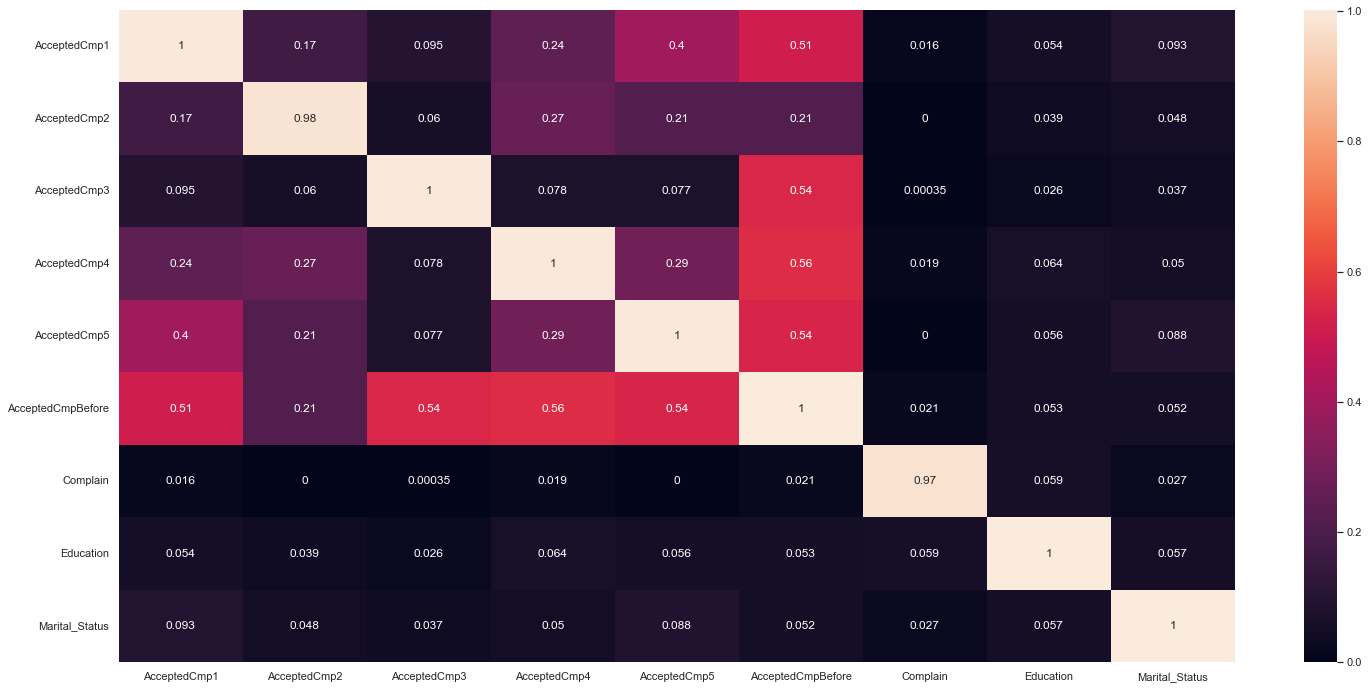

In [71]:
cat_attributes_clean = cat_attributes[cat_attributes.columns.difference(['Response','Dt_Customer_Year_Month'])]

matrix = {}

for i in cat_attributes_clean.columns:
    
    aux = []

    for j in cat_attributes_clean.columns:
        a = cramer_v(cat_attributes[i], cat_attributes[j])
        aux.append(a)

    matrix[i] = aux

corr_matrix = pd.DataFrame(matrix)
corr_matrix = corr_matrix.set_index(corr_matrix.columns)

sns.heatmap(corr_matrix, annot=True);

Insights rápidos:

- Não há correlação significativa entre os atributos categóricos


## 5.0. Wrap-up


Nesta etapa utilizo as análises feitas para validar ou refutar hipóteses e sintetizo os insights de negócio.


In [72]:
df5 = df4.copy()

### 5.1. Validação ou negação das hipóteses


#### H1. Clientes com maior renda são MAIS propensos a aceitar a oferta da campanha [VERDADEIRO]


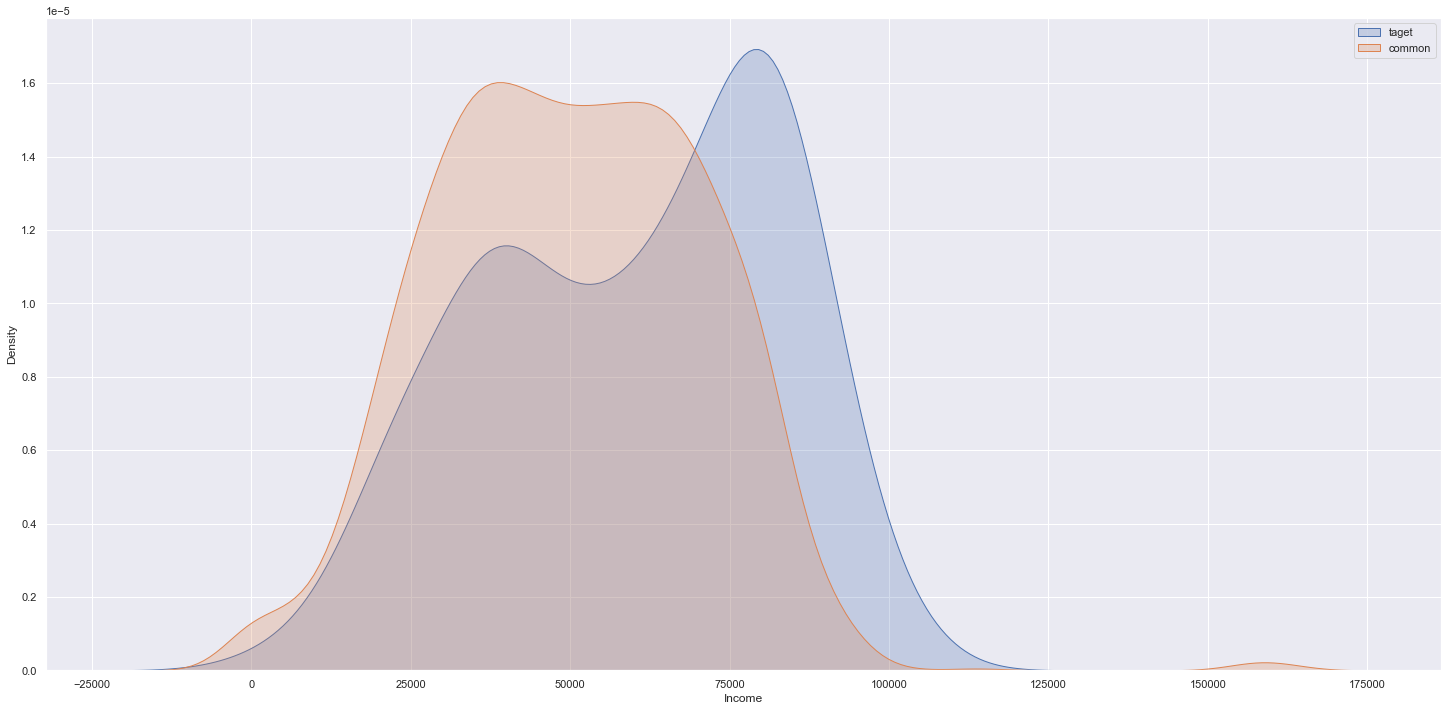

In [73]:
sns.kdeplot(num_attributes_target[num_attributes_target['Income']<200000]['Income'], label='taget', shade=True)
sns.kdeplot(num_attributes_common[num_attributes_common['Income']<200000]['Income'], label='common', shade=True)
plt.legend();

In [74]:
print('Mediana de Income para target: {}'.format(num_attributes_target['Income'].median()))
print('Mediana de Income para common: {}'.format(num_attributes_common['Income'].median()))

Mediana de Income para target: 64090.0
Mediana de Income para common: 49991.0


#### H2. Clientes com mais filhos são MENOS propensos a aceitar a oferta da campanha [VERDADEIRO]


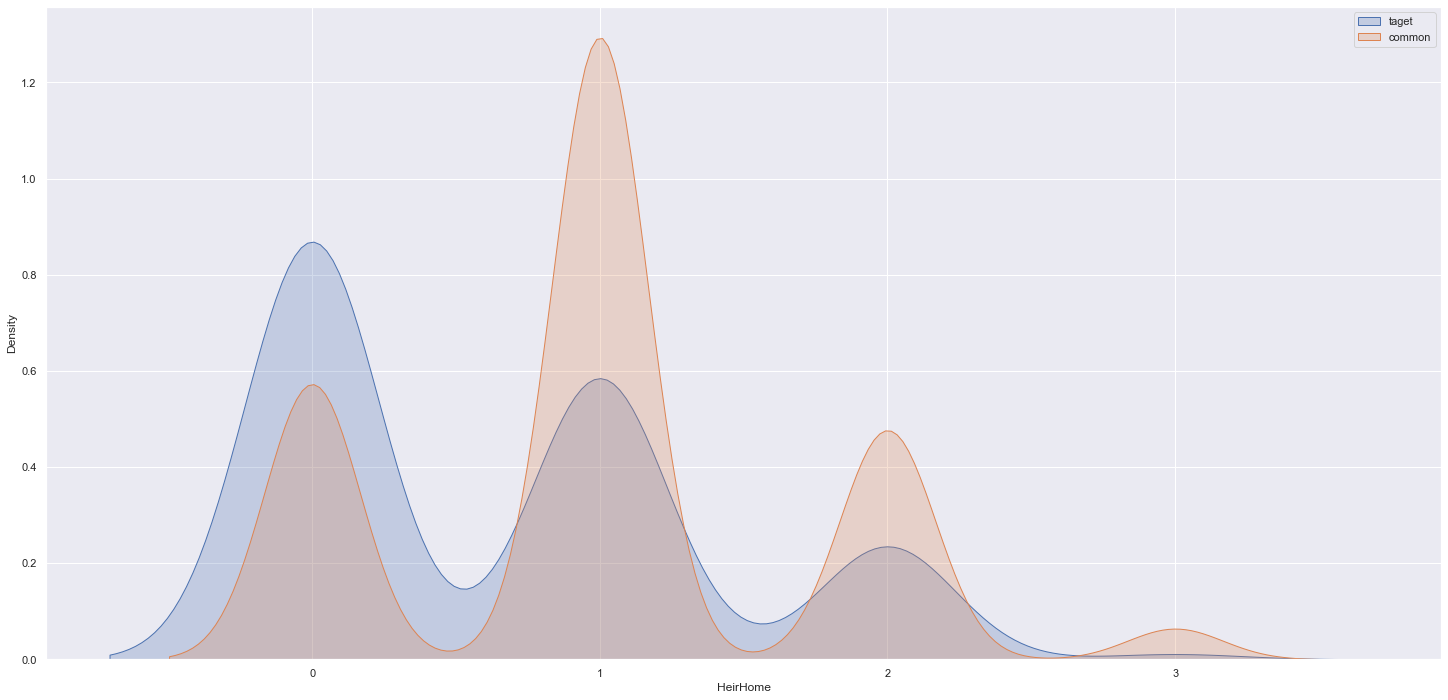

In [75]:
sns.kdeplot(num_attributes_target['HeirHome'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['HeirHome'], label='common', shade=True)
plt.legend();

In [76]:
print('Média de HeirHome para target: {x:.2f}'.format(x=num_attributes_target['HeirHome'].mean()))
print('Média de HeirHome para common: {x:.2f}'.format(x=num_attributes_common['HeirHome'].mean()))

Média de HeirHome para target: 0.64
Média de HeirHome para common: 1.01


#### H3. Clientes casados são MENOS propensos a aceitar a oferta da campanha [FALSO]


Clientes sozinhos (Single, Widow, Divorced) são mais propensos a aceitar a oferta.


In [77]:
pivot_marital = pd.pivot_table(cat_attributes[['Marital_Status','Response']].reset_index(), index='Marital_Status', columns='Response', aggfunc='count', margins=True)['index']
pivot_marital['Percent_True'] = pivot_marital[True]/pivot_marital['All']
pivot_marital['Percent_False'] = pivot_marital[False]/pivot_marital['All']
pivot_marital

Response,False,True,All,Percent_True,Percent_False
Marital_Status,,,,,
Absurd,NaN,1.0,1,1.000000,NaN
Alone,1.0,NaN,1,NaN,1.000000
Divorced,170.0,43.0,213,0.201878,0.798122
Married,700.0,92.0,792,0.116162,0.883838
Single,343.0,101.0,444,0.227477,0.772523
Together,465.0,55.0,520,0.105769,0.894231
Widow,52.0,19.0,71,0.267606,0.732394
YOLO,1.0,NaN,1,NaN,1.000000
All,1732.0,311.0,2043,0.152227,0.847773


#### H4. Clientes com maior nível de educação formal são MAIS propensos a aceitar a oferta da campanha [FALSO]


As distribuições são bem parecidas, não é seguro concluir que a formação afeta o resultado.


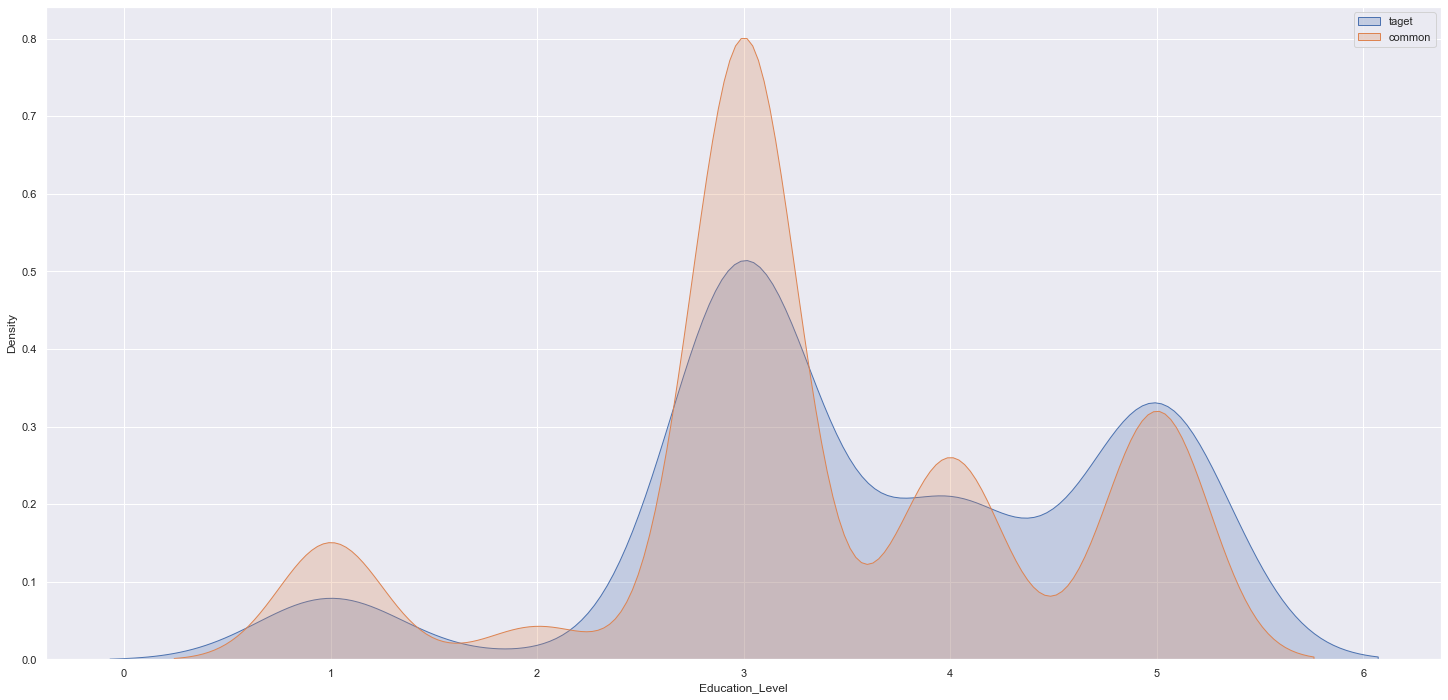

In [78]:
sns.kdeplot(num_attributes_target['Education_Level'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['Education_Level'], label='common', shade=True)
plt.legend();

In [79]:
print('Mediana de Education_Level para target: {x:.2f}'.format(x=num_attributes_target['Education_Level'].median()))
print('Mediana de Education_Level para common: {x:.2f}'.format(x=num_attributes_common['Education_Level'].median()))
print('Média de Education_Level para target: {x:.2f}'.format(x=num_attributes_target['Education_Level'].mean()))
print('Média de Education_Level para common: {x:.2f}'.format(x=num_attributes_common['Education_Level'].mean()))

Mediana de Education_Level para target: 3.00
Mediana de Education_Level para common: 3.00
Média de Education_Level para target: 3.61
Média de Education_Level para common: 3.35


#### H5. Clientes mais velhos são MENOS propensos a aceitar a oferta da campanha [FALSO]


As distribuições são bem parecidas, não é seguro concluir que a formação afeta o resultado.


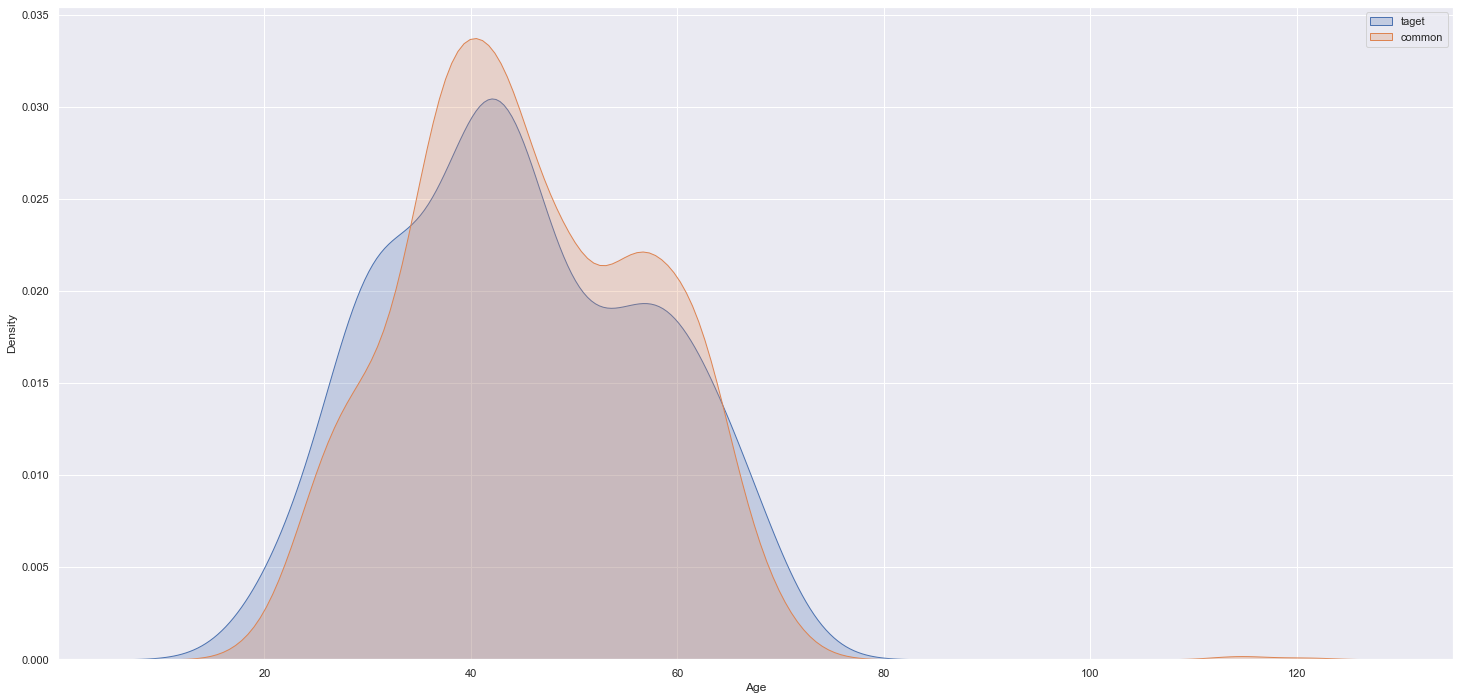

In [80]:
sns.kdeplot(num_attributes_target['Age'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['Age'], label='common', shade=True)
plt.legend();

In [81]:
print('Mediana de Age para target: {x:.2f}'.format(x=num_attributes_target['Age'].median()))
print('Mediana de Age para common: {x:.2f}'.format(x=num_attributes_common['Age'].median()))
print('Média de Age para target: {x:.2f}'.format(x=num_attributes_target['Age'].mean()))
print('Média de Age para common: {x:.2f}'.format(x=num_attributes_common['Age'].mean()))

Mediana de Age para target: 43.00
Mediana de Age para common: 44.00
Média de Age para target: 44.50
Média de Age para common: 45.37


#### H6. Clientes que visitam mais o site são MAIS propensos a aceitar a oferta [FALSO]


As distribuições são bem parecidas, não é seguro concluir que a formação afeta o resultado.


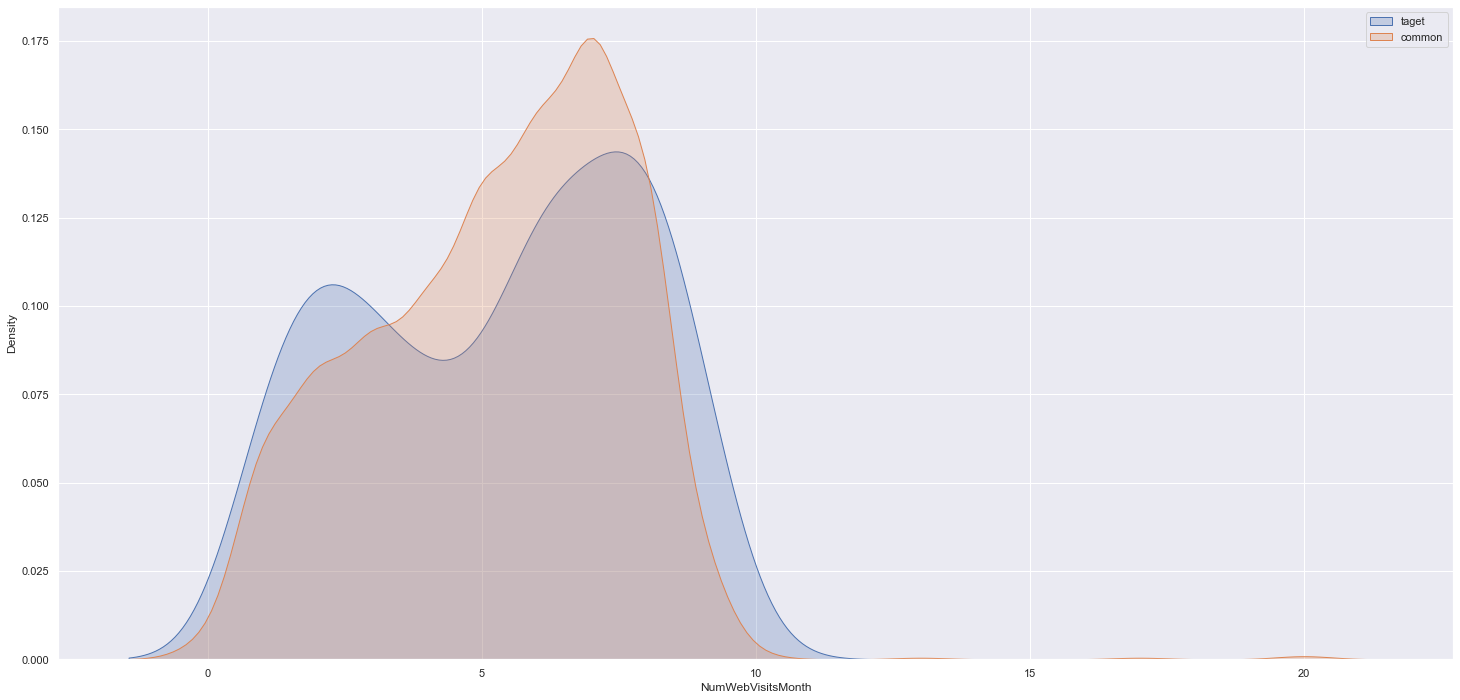

In [82]:
sns.kdeplot(num_attributes_target['NumWebVisitsMonth'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['NumWebVisitsMonth'], label='common', shade=True)
plt.legend();

In [83]:
print('Mediana de NumWebVisitsMonth para target: {x:.2f}'.format(x=num_attributes_target['NumWebVisitsMonth'].median()))
print('Mediana de NumWebVisitsMonth para common: {x:.2f}'.format(x=num_attributes_common['NumWebVisitsMonth'].median()))
print('Média de NumWebVisitsMonth para target: {x:.2f}'.format(x=num_attributes_target['NumWebVisitsMonth'].mean()))
print('Média de NumWebVisitsMonth para common: {x:.2f}'.format(x=num_attributes_common['NumWebVisitsMonth'].mean()))

Mediana de NumWebVisitsMonth para target: 6.00
Mediana de NumWebVisitsMonth para common: 6.00
Média de NumWebVisitsMonth para target: 5.30
Média de NumWebVisitsMonth para common: 5.29


#### H7. Clientes que fazem mais mais compras são MAIS propensos a aceitar a oferta [VERDADEIRO]


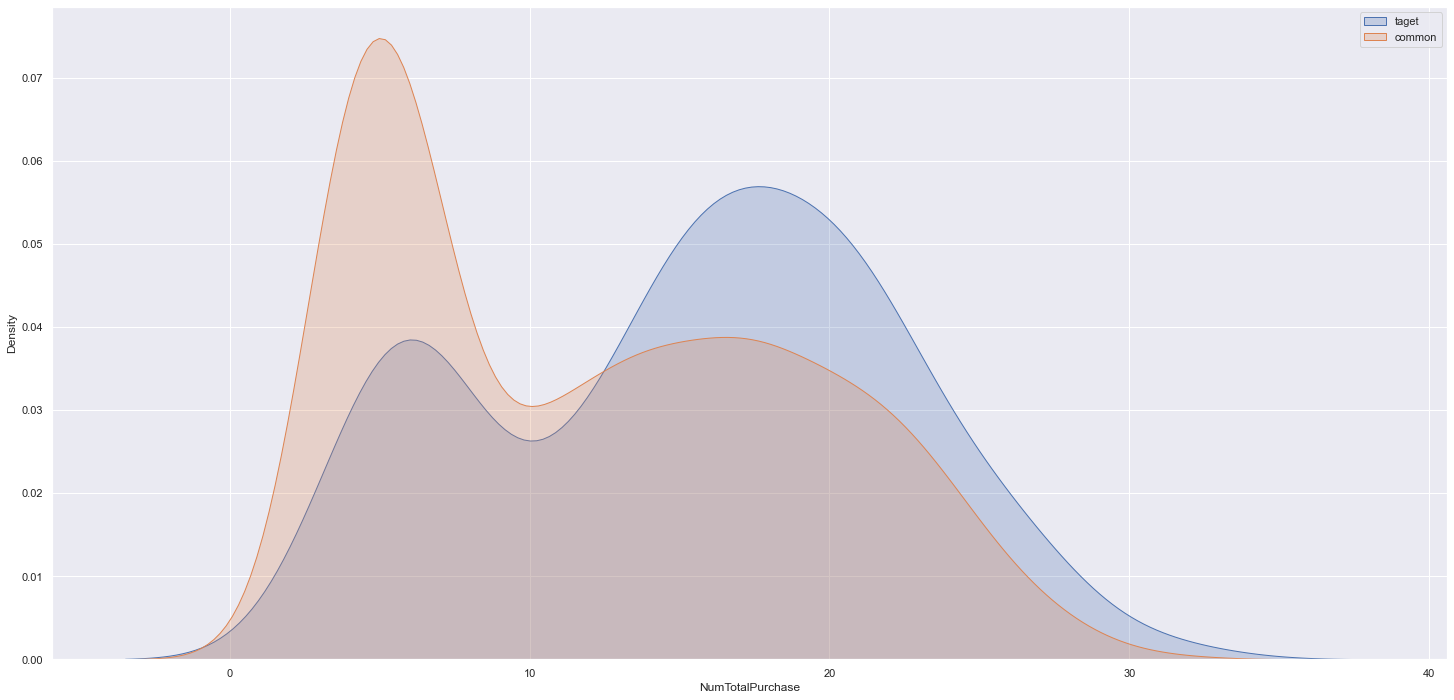

In [84]:
sns.kdeplot(num_attributes_target['NumTotalPurchase'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['NumTotalPurchase'], label='common', shade=True)
plt.legend();

In [85]:
print('Mediana de NumTotalPurchase para target: {x:.2f}'.format(x=num_attributes_target['NumTotalPurchase'].median()))
print('Mediana de NumTotalPurchase para common: {x:.2f}'.format(x=num_attributes_common['NumTotalPurchase'].median()))
print('Média de NumTotalPurchase para target: {x:.2f}'.format(x=num_attributes_target['NumTotalPurchase'].mean()))
print('Média de NumTotalPurchase para common: {x:.2f}'.format(x=num_attributes_common['NumTotalPurchase'].mean()))

Mediana de NumTotalPurchase para target: 16.00
Mediana de NumTotalPurchase para common: 11.00
Média de NumTotalPurchase para target: 15.32
Média de NumTotalPurchase para common: 12.10


#### H8. Clientes que fazem mais mais compras via web são MAIS propensos a aceitar a oferta [VERDADEIRO]


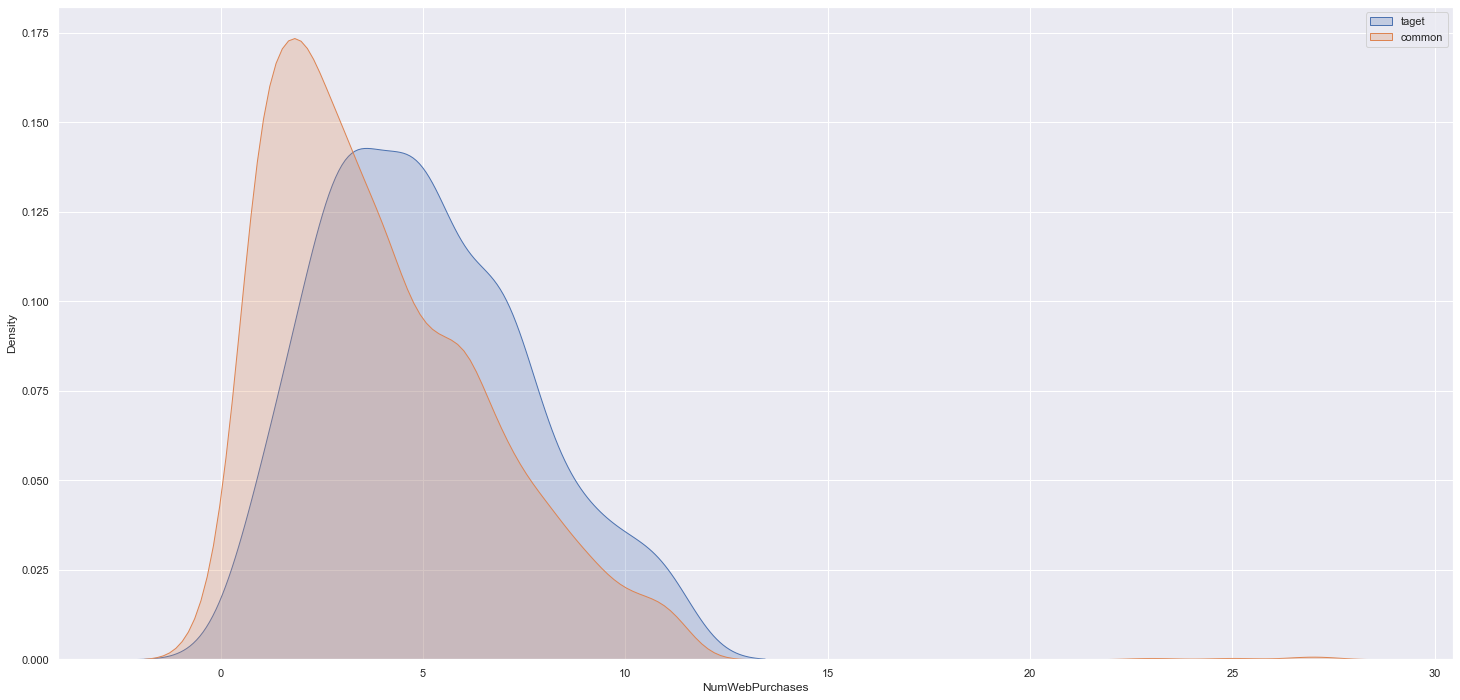

In [86]:
sns.kdeplot(num_attributes_target['NumWebPurchases'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['NumWebPurchases'], label='common', shade=True)
plt.legend();

In [87]:
print('Mediana de NumWebPurchases para target: {x:.2f}'.format(x=num_attributes_target['NumWebPurchases'].median()))
print('Mediana de NumWebPurchases para common: {x:.2f}'.format(x=num_attributes_common['NumWebPurchases'].median()))
print('Média de NumWebPurchases para target: {x:.2f}'.format(x=num_attributes_target['NumWebPurchases'].mean()))
print('Média de NumWebPurchases para common: {x:.2f}'.format(x=num_attributes_common['NumWebPurchases'].mean()))

Mediana de NumWebPurchases para target: 5.00
Mediana de NumWebPurchases para common: 3.00
Média de NumWebPurchases para target: 5.07
Média de NumWebPurchases para common: 3.95


#### H9. Clientes que gastam mais são MAIS propensos a aceitar a oferta [VERDADEIRO]


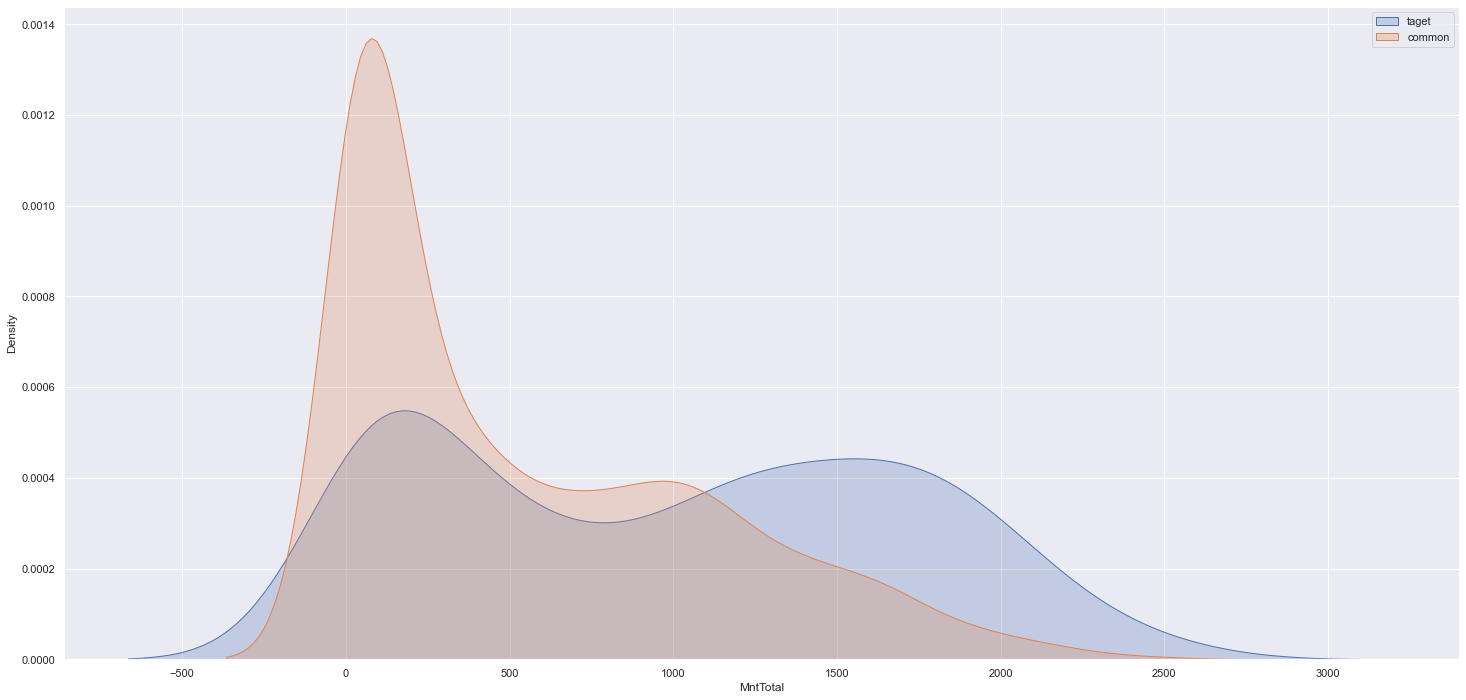

In [88]:
sns.kdeplot(num_attributes_target['MntTotal'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['MntTotal'], label='common', shade=True)
plt.legend();

In [89]:
print('Mediana de MntTotal para target: {x:.2f}'.format(x=num_attributes_target['MntTotal'].median()))
print('Mediana de MntTotal para common: {x:.2f}'.format(x=num_attributes_common['MntTotal'].median()))
print('Média de MntTotal para target: {x:.2f}'.format(x=num_attributes_target['MntTotal'].mean()))
print('Média de MntTotal para common: {x:.2f}'.format(x=num_attributes_common['MntTotal'].mean()))

Mediana de MntTotal para target: 1062.00
Mediana de MntTotal para common: 318.50
Média de MntTotal para target: 984.77
Média de MntTotal para common: 542.08


#### H10. Clientes que gastam mais em Ouro são MAIS propensos a aceitar a oferta [VERDADEIRO]


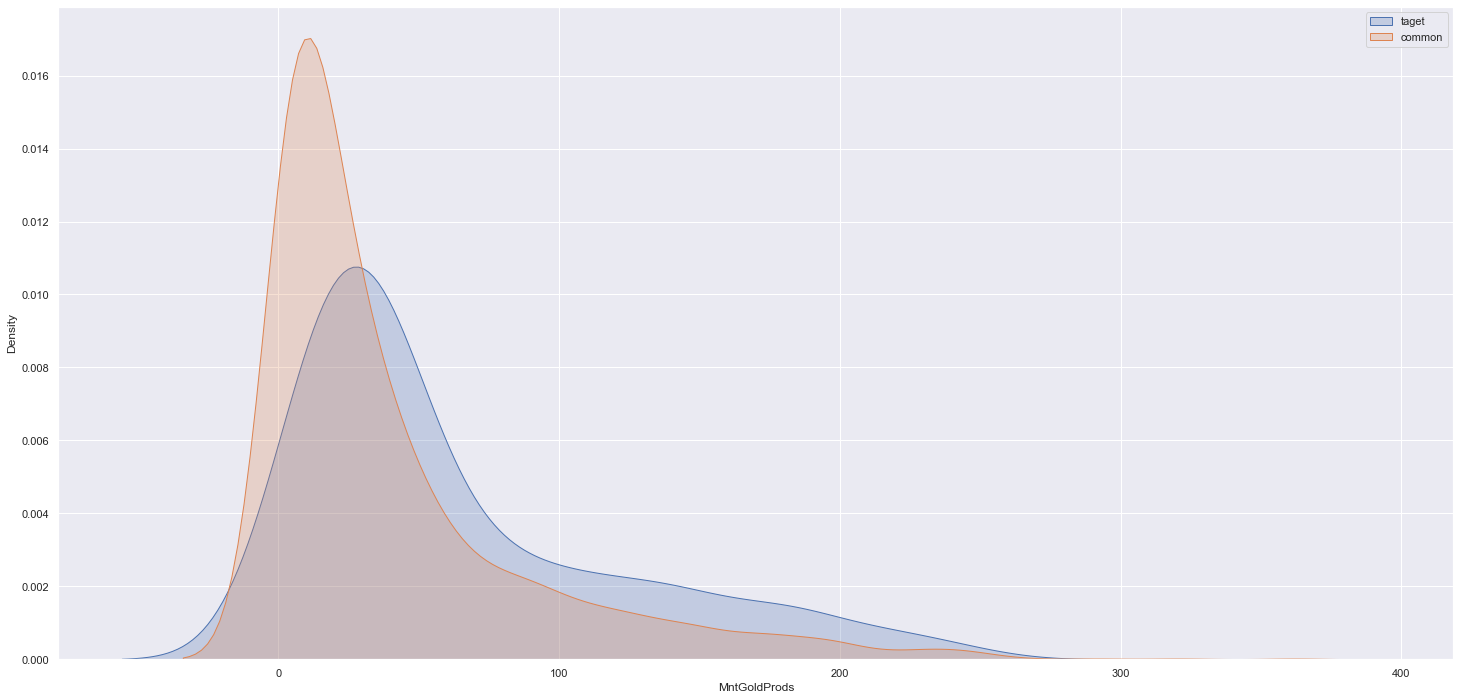

In [90]:
sns.kdeplot(num_attributes_target['MntGoldProds'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['MntGoldProds'], label='common', shade=True)
plt.legend();

In [91]:
print('Mediana de MntGoldProds para target: {x:.2f}'.format(x=num_attributes_target['MntGoldProds'].median()))
print('Mediana de MntGoldProds para common: {x:.2f}'.format(x=num_attributes_common['MntGoldProds'].median()))
print('Média de MntGoldProds para target: {x:.2f}'.format(x=num_attributes_target['MntGoldProds'].mean()))
print('Média de MntGoldProds para common: {x:.2f}'.format(x=num_attributes_common['MntGoldProds'].mean()))

Mediana de MntGoldProds para target: 40.00
Mediana de MntGoldProds para common: 21.00
Média de MntGoldProds para target: 62.97
Média de MntGoldProds para common: 40.66


#### H11. Clientes que gastam mais em Vinho são MAIS propensos a aceitar a oferta [VERDADEIRO]


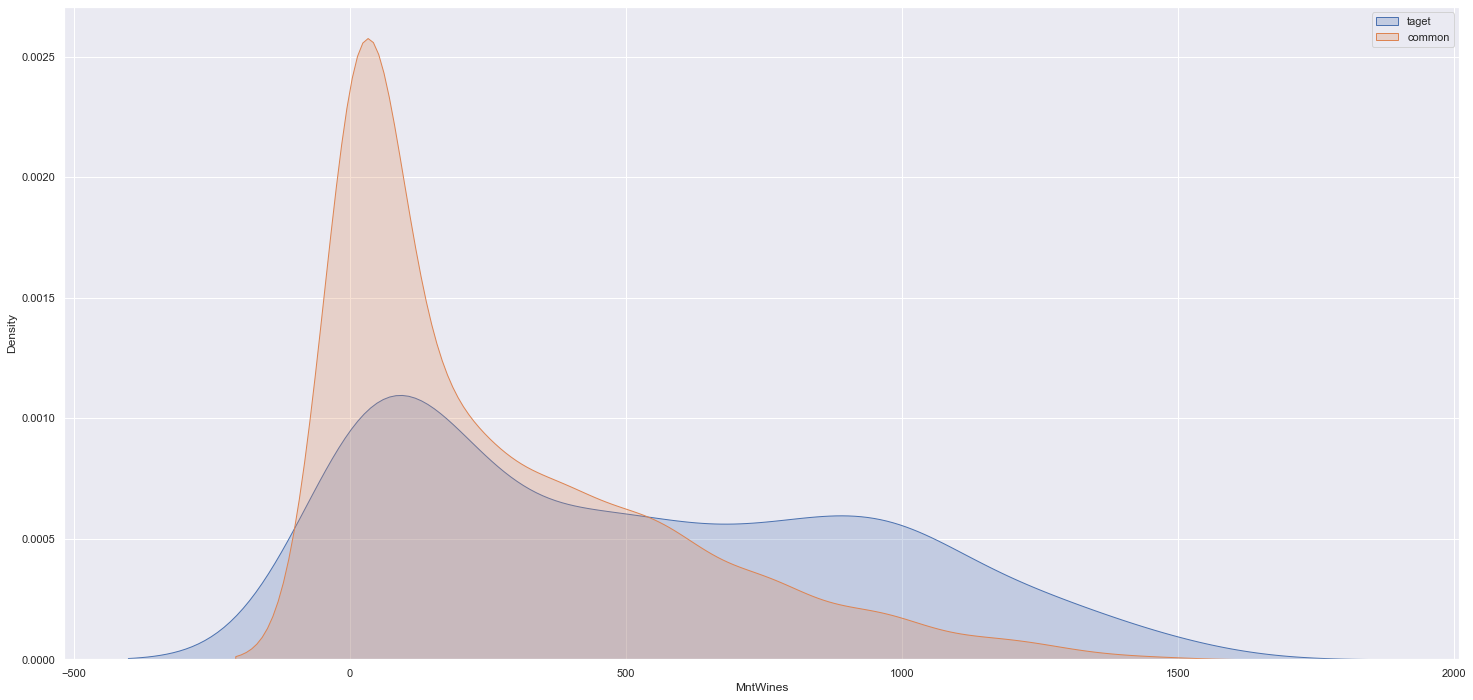

In [92]:
sns.kdeplot(num_attributes_target['MntWines'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['MntWines'], label='common', shade=True)
plt.legend();

In [93]:
print('Mediana de MntWines para target: {x:.2f}'.format(x=num_attributes_target['MntWines'].median()))
print('Mediana de MntWines para common: {x:.2f}'.format(x=num_attributes_common['MntWines'].median()))
print('Média de MntWines para target: {x:.2f}'.format(x=num_attributes_target['MntWines'].mean()))
print('Média de MntWines para common: {x:.2f}'.format(x=num_attributes_common['MntWines'].mean()))

Mediana de MntWines para target: 448.00
Mediana de MntWines para common: 157.50
Média de MntWines para target: 495.82
Média de MntWines para common: 271.47


#### H12. Clientes que já reclamaram são MENOS propensos a aceitar a oferta da campanha [FALSO]


A reclamação parece não afetar o aceite da oferta.


In [94]:
pivot_complain = pd.pivot_table(cat_attributes[['Complain','Response']].reset_index(), index='Complain', columns='Response', aggfunc='count', margins=True)['index']
pivot_complain['Percent_True'] = pivot_complain[True]/pivot_complain['All']
pivot_complain['Percent_False'] = pivot_complain[False]/pivot_complain['All']
pivot_complain

Response,False,True,All,Percent_True,Percent_False
Complain,,,,,
False,1715,308,2023,0.152249,0.847751
True,17,3,20,0.150000,0.850000
All,1732,311,2043,0.152227,0.847773


#### H13. Clientes que compraram em outras campanhas são MAIS propensos a aceitar a oferta da campanha [VERDADEIRO]


In [95]:
pivot_cmp_before = pd.pivot_table(cat_attributes[['AcceptedCmpBefore','Response']].reset_index(), index='AcceptedCmpBefore', columns='Response', aggfunc='count', margins=True)['index']
pivot_cmp_before['Percent_False'] = pivot_cmp_before[False]/pivot_cmp_before['All']
pivot_cmp_before['Percent_True'] = pivot_cmp_before[True]/pivot_cmp_before['All']
pivot_cmp_before

Response,False,True,All,Percent_False,Percent_True
AcceptedCmpBefore,,,,,
False,1476,137,1613,0.915065,0.084935
True,256,174,430,0.595349,0.404651
All,1732,311,2043,0.847773,0.152227


#### H14. Clientes mais antigos são MAIS propensos a aceitar a oferta da campanha [VERDADEIRO]


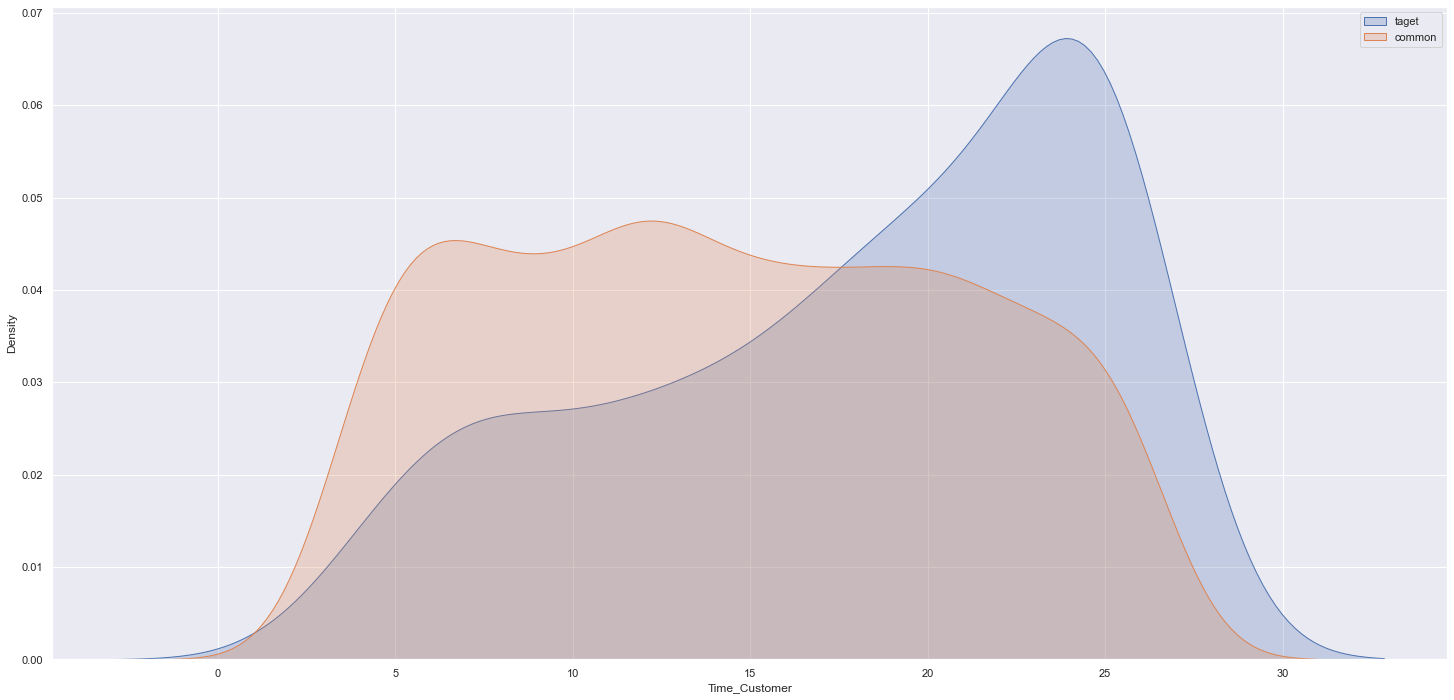

In [96]:
sns.kdeplot(num_attributes_target['Time_Customer'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['Time_Customer'], label='common', shade=True)
plt.legend();

In [97]:
print('Mediana de Time_Customer para target: {x:.2f}'.format(x=num_attributes_target['Time_Customer'].median()))
print('Mediana de Time_Customer para common: {x:.2f}'.format(x=num_attributes_common['Time_Customer'].median()))
print('Média de Time_Customer para target: {x:.2f}'.format(x=num_attributes_target['Time_Customer'].mean()))
print('Média de Time_Customer para common: {x:.2f}'.format(x=num_attributes_common['Time_Customer'].mean()))

Mediana de Time_Customer para target: 19.43
Mediana de Time_Customer para common: 14.17
Média de Time_Customer para target: 18.02
Média de Time_Customer para common: 14.47


#### H15. Clientes que fizeram compras mais recentes são MENOS propensos a aceitar a oferta da campanha [FALSO]


Clientes com compras mais recentes são MAIS propensos a aceitar a oferta.


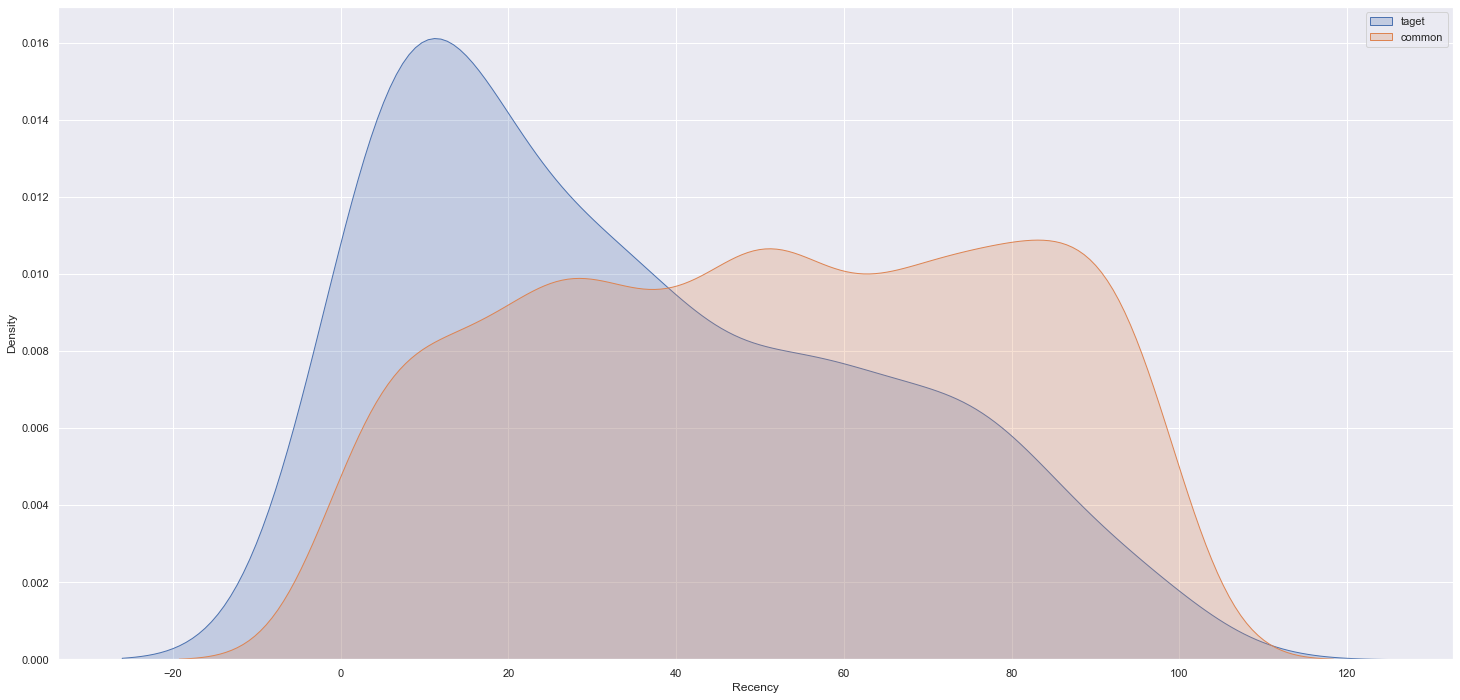

In [98]:
sns.kdeplot(num_attributes_target['Recency'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['Recency'], label='common', shade=True)
plt.legend();

In [99]:
print('Mediana de Recency para target: {x:.2f}'.format(x=num_attributes_target['Recency'].median()))
print('Mediana de Recency para common: {x:.2f}'.format(x=num_attributes_common['Recency'].median()))
print('Média de Recency para target: {x:.2f}'.format(x=num_attributes_target['Recency'].mean()))
print('Média de Recency para common: {x:.2f}'.format(x=num_attributes_common['Recency'].mean()))

Mediana de Recency para target: 30.00
Mediana de Recency para common: 52.00
Média de Recency para target: 35.16
Média de Recency para common: 51.46


#### H16. Clientes com maior AOV são MAIS propensos a aceitar a oferta da campanha [VERDADEIRO]


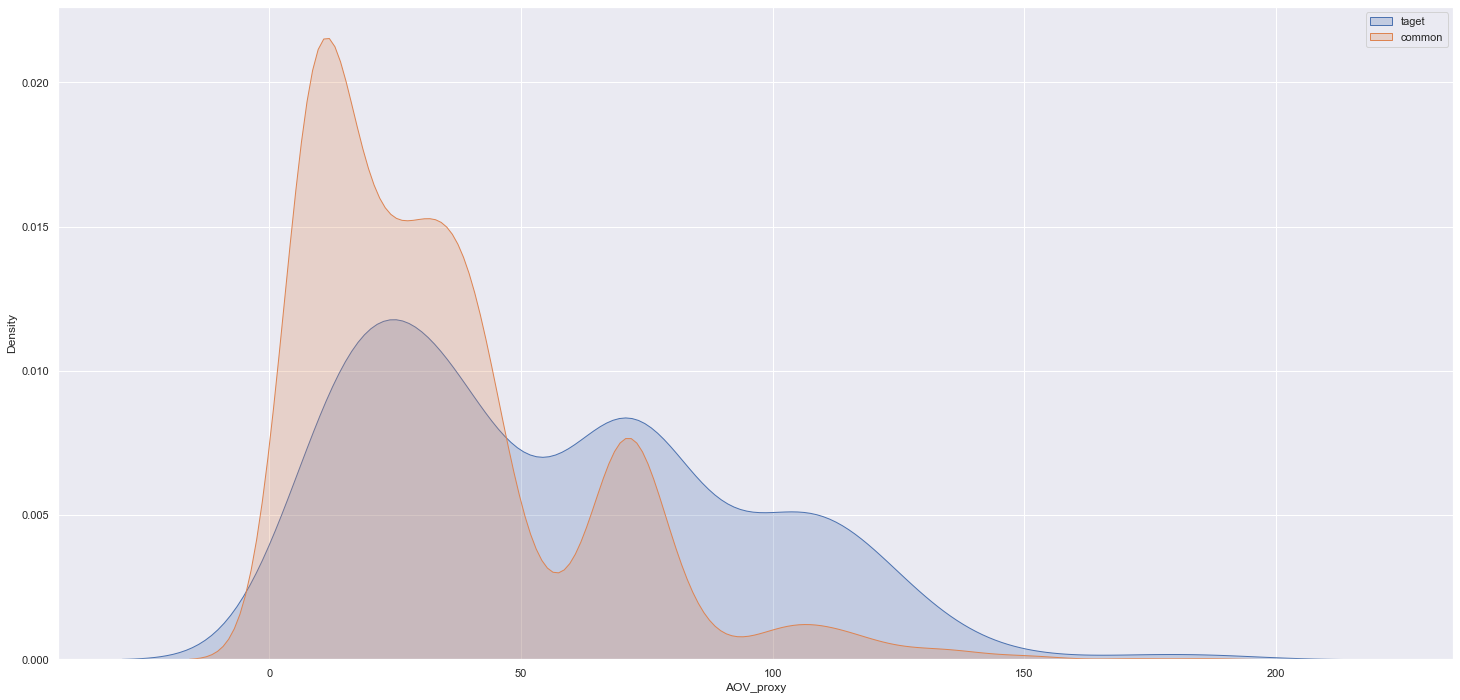

In [100]:
sns.kdeplot(num_attributes_target[num_attributes_target['AOV_proxy']<500]['AOV_proxy'], label='taget', shade=True)
sns.kdeplot(num_attributes_common[num_attributes_common['AOV_proxy']<500]['AOV_proxy'], label='common', shade=True)
plt.legend();

In [101]:
print('Mediana de AOV_proxy para target: {x:.2f}'.format(x=num_attributes_target['AOV_proxy'].median()))
print('Mediana de AOV_proxy para common: {x:.2f}'.format(x=num_attributes_common['AOV_proxy'].median()))
print('Média de AOV_proxy para target: {x:.2f}'.format(x=num_attributes_target['AOV_proxy'].mean()))
print('Média de AOV_proxy para common: {x:.2f}'.format(x=num_attributes_common['AOV_proxy'].mean()))

Mediana de AOV_proxy para target: 47.27
Mediana de AOV_proxy para common: 27.90
Média de AOV_proxy para target: 56.25
Média de AOV_proxy para common: 35.17


#### H17. Clientes que compram mais em promoções são MAIS propensos a aceitar a oferta da campanha [FALSO]


Clientes que compram MENOS em promoções são MAIS propensos a aceitar a oferta.


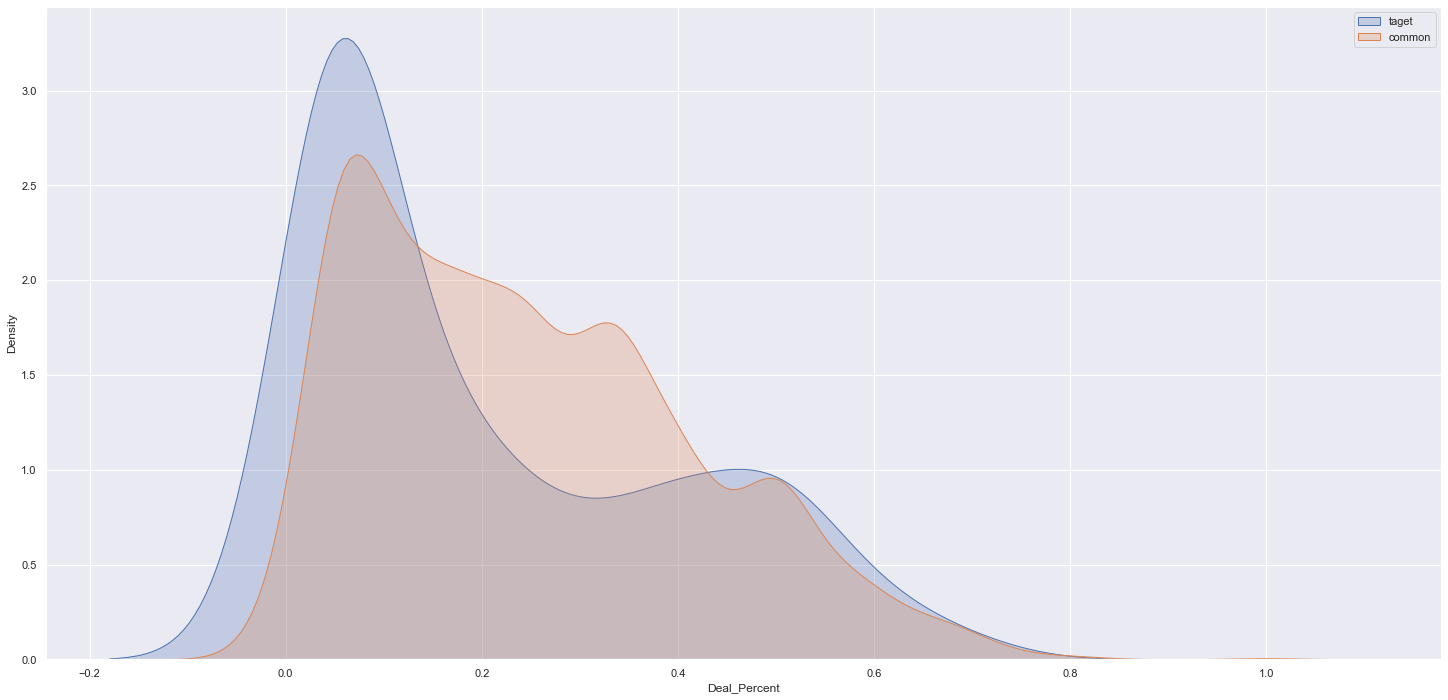

In [102]:
sns.kdeplot(num_attributes_target['Deal_Percent'], label='taget', shade=True)
sns.kdeplot(num_attributes_common['Deal_Percent'], label='common', shade=True)
plt.legend();

In [103]:
print('Mediana de Deal_Percent para target: {x:.2f}'.format(x=num_attributes_target['Deal_Percent'].median()))
print('Mediana de Deal_Percent para common: {x:.2f}'.format(x=num_attributes_common['Deal_Percent'].median()))
print('Média de Deal_Percent para target: {x:.2f}'.format(x=num_attributes_target['Deal_Percent'].mean()))
print('Média de Deal_Percent para common: {x:.2f}'.format(x=num_attributes_common['Deal_Percent'].mean()))

Mediana de Deal_Percent para target: 0.12
Mediana de Deal_Percent para common: 0.22
Média de Deal_Percent para target: 0.21
Média de Deal_Percent para common: 0.25


### 5.2. Insights


#### Clientes de MAIOR RENDA tendem a comprar mais Vinho e Carne e menos Produtos de Ouro.


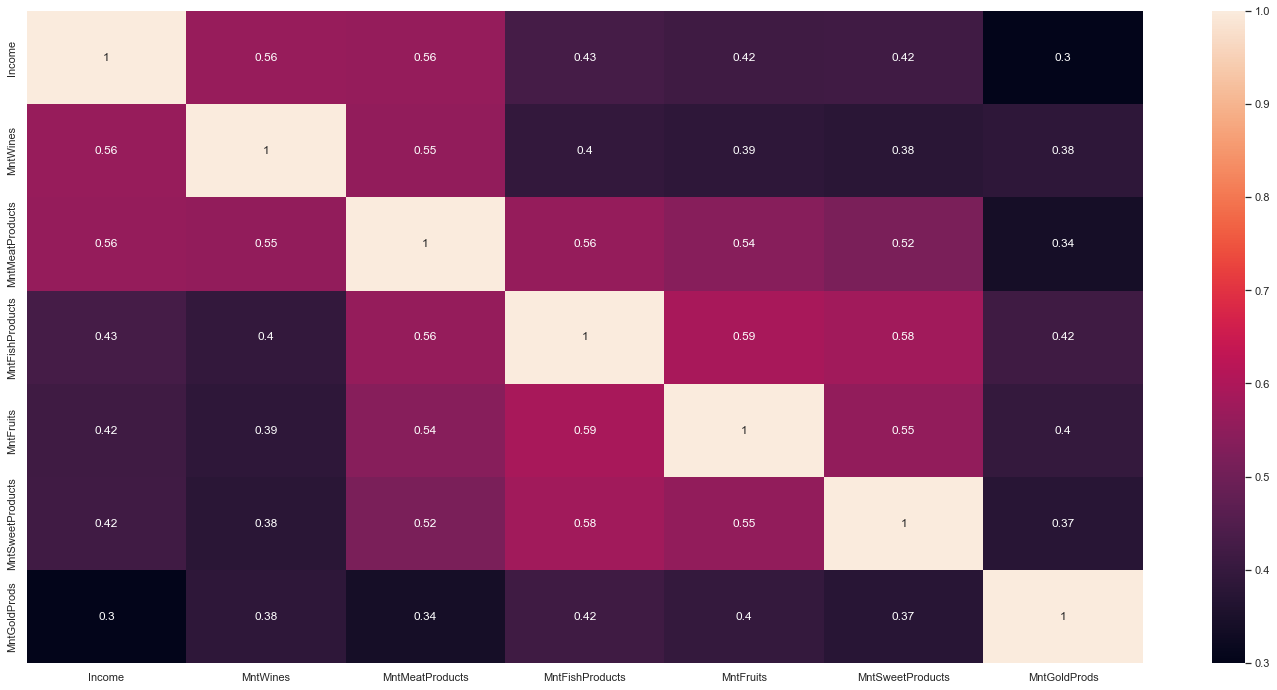

In [104]:
correlation = df5[['Income','MntWines','MntMeatProducts','MntFishProducts','MntFruits','MntSweetProducts','MntGoldProds']].corr(method='pearson')
sns.heatmap(correlation, annot=True);

#### Clientes que compram mais Vinho parecem comprar mais via catálogo e aproveitar menos promoções


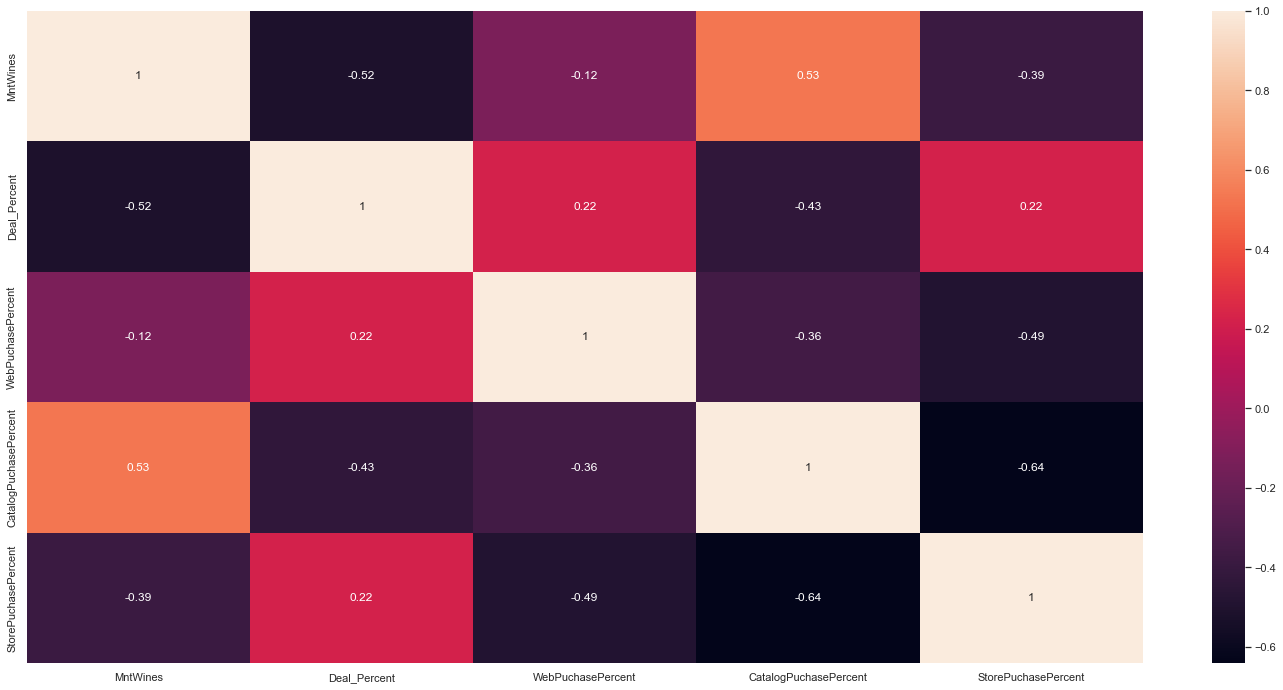

In [105]:
correlation = df5[['MntWines','Deal_Percent','WebPuchasePercent','CatalogPuchasePercent','StorePuchasePercent']].corr(method='pearson')
sns.heatmap(correlation, annot=True);

#### Clientes com mais crianças tendem a comprar menos e aproveitar mais promoções


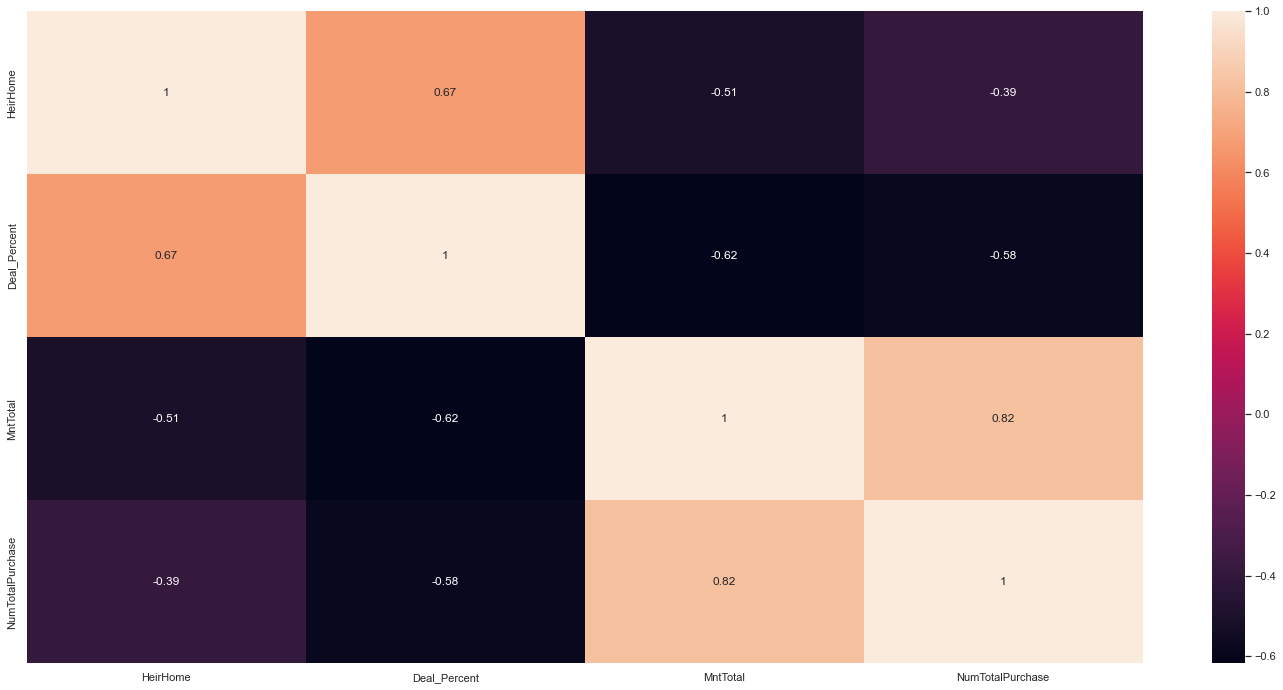

In [106]:
correlation = df5[['HeirHome','Deal_Percent','MntTotal','NumTotalPurchase']].corr(method='pearson')
sns.heatmap(correlation, annot=True);

#### Clientes que compram mais pela Web e que fazem mais visitas ao site aproveitam mais promoções e gastam menos

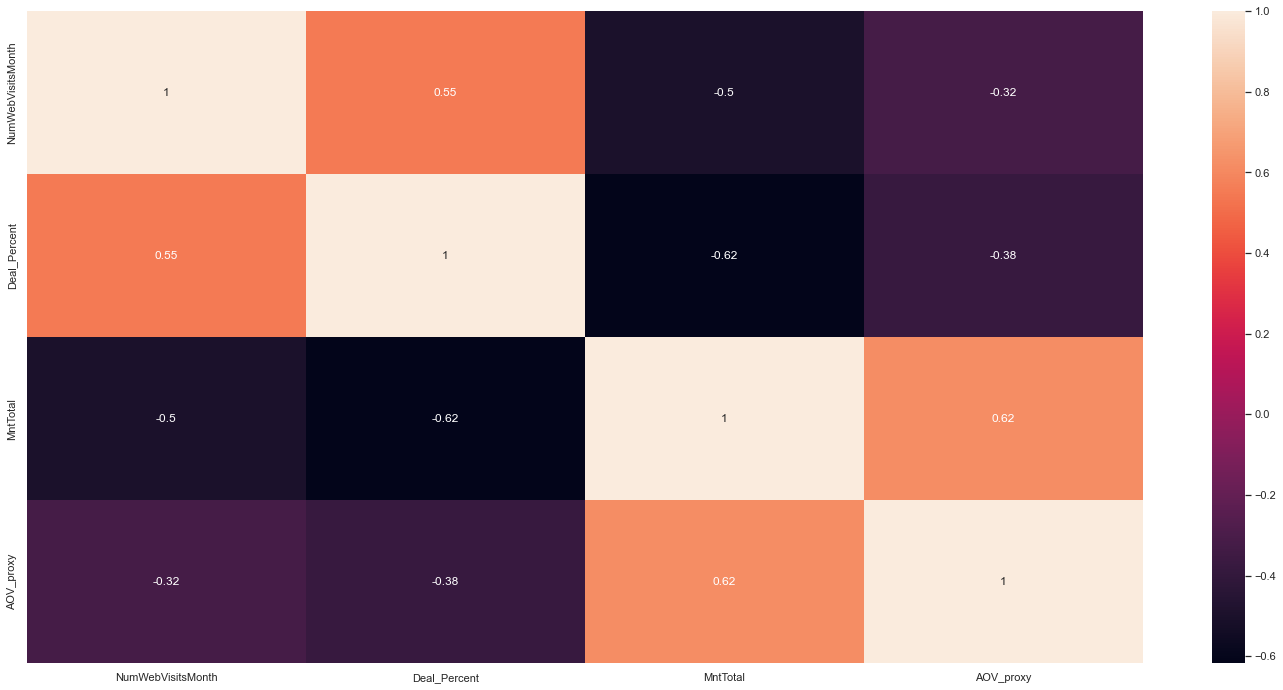

In [107]:
correlation = df5[['NumWebVisitsMonth','Deal_Percent','MntTotal','AOV_proxy']].corr(method='pearson')
sns.heatmap(correlation, annot=True);